# Исследование объявлений о продаже квартир

В вашем распоряжении данные сервиса Яндекс Недвижимость — архив объявлений о продаже квартир в Санкт-Петербурге и соседних населённых пунктах за несколько лет. Вам нужно научиться определять рыночную стоимость объектов недвижимости. Для этого проведите исследовательский анализ данных и установите параметры, влияющие на цену объектов. Это позволит построить автоматизированную систему: она отследит аномалии и мошенническую деятельность.

По каждой квартире на продажу доступны два вида данных. Первые вписаны пользователем, вторые — получены автоматически на основе картографических данных. Например, расстояние до центра, аэропорта и других объектов — эти данные автоматически получены из геосервисов. Количество парков и водоёмов также заполняется без участия пользователя.

Для удобной работы отобразим описание данных:


- `airports_nearest` — расстояние до ближайшего аэропорта в метрах (м)
- `balcony` — число балконов
- `ceiling_height` — высота потолков (м)
- `cityCenters_nearest` — расстояние до центра города (м)
- `days_exposition` — сколько дней было размещено объявление (от публикации до снятия)
- `first_day_exposition` — дата публикации
- `floor` — этаж
- `floors_total` — всего этажей в доме
- `is_apartment` — апартаменты (булев тип)
- `kitchen_area` — площадь кухни в квадратных метрах (м²)
- `last_price` — цена на момент снятия с публикации
- `living_area` — жилая площадь в квадратных метрах (м²)
- `locality_name` — название населённого пункта
- `open_plan` — свободная планировка (булев тип)
- `parks_around3000` — число парков в радиусе 3 км
- `parks_nearest` — расстояние до ближайшего парка (м)
- `ponds_around3000` — число водоёмов в радиусе 3 км
- `ponds_nearest` — расстояние до ближайшего водоёма (м)
- `rooms` — число комнат
- `studio` — квартира-студия (булев тип)
- `total_area` — общая площадь квартиры в квадратных метрах (м²)
- `total_images` — число фотографий квартиры в объявлении

### Откройте файл с данными и изучите общую информацию

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [2]:
data = pd.read_csv('C:\\real_estate_data.csv', sep='\t')
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23699 entries, 0 to 23698
Data columns (total 22 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   total_images          23699 non-null  int64  
 1   last_price            23699 non-null  float64
 2   total_area            23699 non-null  float64
 3   first_day_exposition  23699 non-null  object 
 4   rooms                 23699 non-null  int64  
 5   ceiling_height        14504 non-null  float64
 6   floors_total          23613 non-null  float64
 7   living_area           21796 non-null  float64
 8   floor                 23699 non-null  int64  
 9   is_apartment          2775 non-null   object 
 10  studio                23699 non-null  bool   
 11  open_plan             23699 non-null  bool   
 12  kitchen_area          21421 non-null  float64
 13  balcony               12180 non-null  float64
 14  locality_name         23650 non-null  object 
 15  airports_nearest   

In [3]:
data_shape = data.shape

In [4]:
data_shape

(23699, 22)

In [5]:
data.head()

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
0,20,13000000.0,108.0,2019-03-07T00:00:00,3,2.70,16.0,51.0,8,NaN,...,25.0,NaN,Санкт-Петербург,18863.0,16028.0,1.0,482.0,2.0,755.0,NaN
1,7,3350000.0,40.4,2018-12-04T00:00:00,1,NaN,11.0,18.6,1,NaN,...,11.0,2.0,посёлок Шушары,12817.0,18603.0,0.0,NaN,0.0,NaN,81.0
2,10,5196000.0,56.0,2015-08-20T00:00:00,2,NaN,5.0,34.3,4,NaN,...,8.3,0.0,Санкт-Петербург,21741.0,13933.0,1.0,90.0,2.0,574.0,558.0
3,0,64900000.0,159.0,2015-07-24T00:00:00,3,NaN,14.0,NaN,9,NaN,...,NaN,0.0,Санкт-Петербург,28098.0,6800.0,2.0,84.0,3.0,234.0,424.0
4,2,10000000.0,100.0,2018-06-19T00:00:00,2,3.03,14.0,32.0,13,NaN,...,41.0,NaN,Санкт-Петербург,31856.0,8098.0,2.0,112.0,1.0,48.0,121.0


In [6]:
data.describe()

,total_images,last_price,total_area,rooms,ceiling_height,floors_total,living_area,floor,kitchen_area,balcony,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
count,23699.000000,2.369900e+04,23699.000000,23699.000000,14504.000000,23613.000000,21796.000000,23699.000000,21421.000000,12180.000000,18157.000000,18180.000000,18181.000000,8079.000000,18181.000000,9110.000000,20518.000000
mean,9.858475,6.541549e+06,60.348651,2.070636,2.771499,10.673824,34.457852,5.892358,10.569807,1.150082,28793.672193,14191.277833,0.611408,490.804555,0.770255,517.980900,180.888634
std,5.682529,1.088701e+07,35.654083,1.078405,1.261056,6.597173,22.030445,4.885249,5.905438,1.071300,12630.880622,8608.386210,0.802074,342.317995,0.938346,277.720643,219.727988
min,0.000000,1.219000e+04,12.000000,0.000000,1.000000,1.000000,2.000000,1.000000,1.300000,0.000000,0.000000,181.000000,0.000000,1.000000,0.000000,13.000000,1.000000
25%,6.000000,3.400000e+06,40.000000,1.000000,2.520000,5.000000,18.600000,2.000000,7.000000,0.000000,18585.000000,9238.000000,0.000000,288.000000,0.000000,294.000000,45.000000
50%,9.000000,4.650000e+06,52.000000,2.000000,2.650000,9.000000,30.000000,4.000000,9.100000,1.000000,26726.000000,13098.500000,0.000000,455.000000,1.000000,502.000000,95.000000
75%,14.000000,6.800000e+06,69.900000,3.000000,2.800000,16.000000,42.300000,8.000000,12.000000,2.000000,37273.000000,16293.000000,1.000000,612.000000,1.000000,729.000000,232.000000
max,50.000000,7.630000e+08,900.000000,19.000000,100.000000,60.000000,409.700000,33.000000,112.000000,5.000000,84869.000000,65968.000000,3.000000,3190.000000,3.000000,1344.000000,1580.000000


array([[<Axes: title={'center': 'total_images'}>,
        <Axes: title={'center': 'last_price'}>,
        <Axes: title={'center': 'total_area'}>,
        <Axes: title={'center': 'rooms'}>],
       [<Axes: title={'center': 'ceiling_height'}>,
        <Axes: title={'center': 'floors_total'}>,
        <Axes: title={'center': 'living_area'}>,
        <Axes: title={'center': 'floor'}>],
       [<Axes: title={'center': 'kitchen_area'}>,
        <Axes: title={'center': 'balcony'}>,
        <Axes: title={'center': 'airports_nearest'}>,
        <Axes: title={'center': 'cityCenters_nearest'}>],
       [<Axes: title={'center': 'parks_around3000'}>,
        <Axes: title={'center': 'parks_nearest'}>,
        <Axes: title={'center': 'ponds_around3000'}>,
        <Axes: title={'center': 'ponds_nearest'}>],
       [<Axes: title={'center': 'days_exposition'}>, <Axes: >, <Axes: >,
        <Axes: >]], dtype=object)

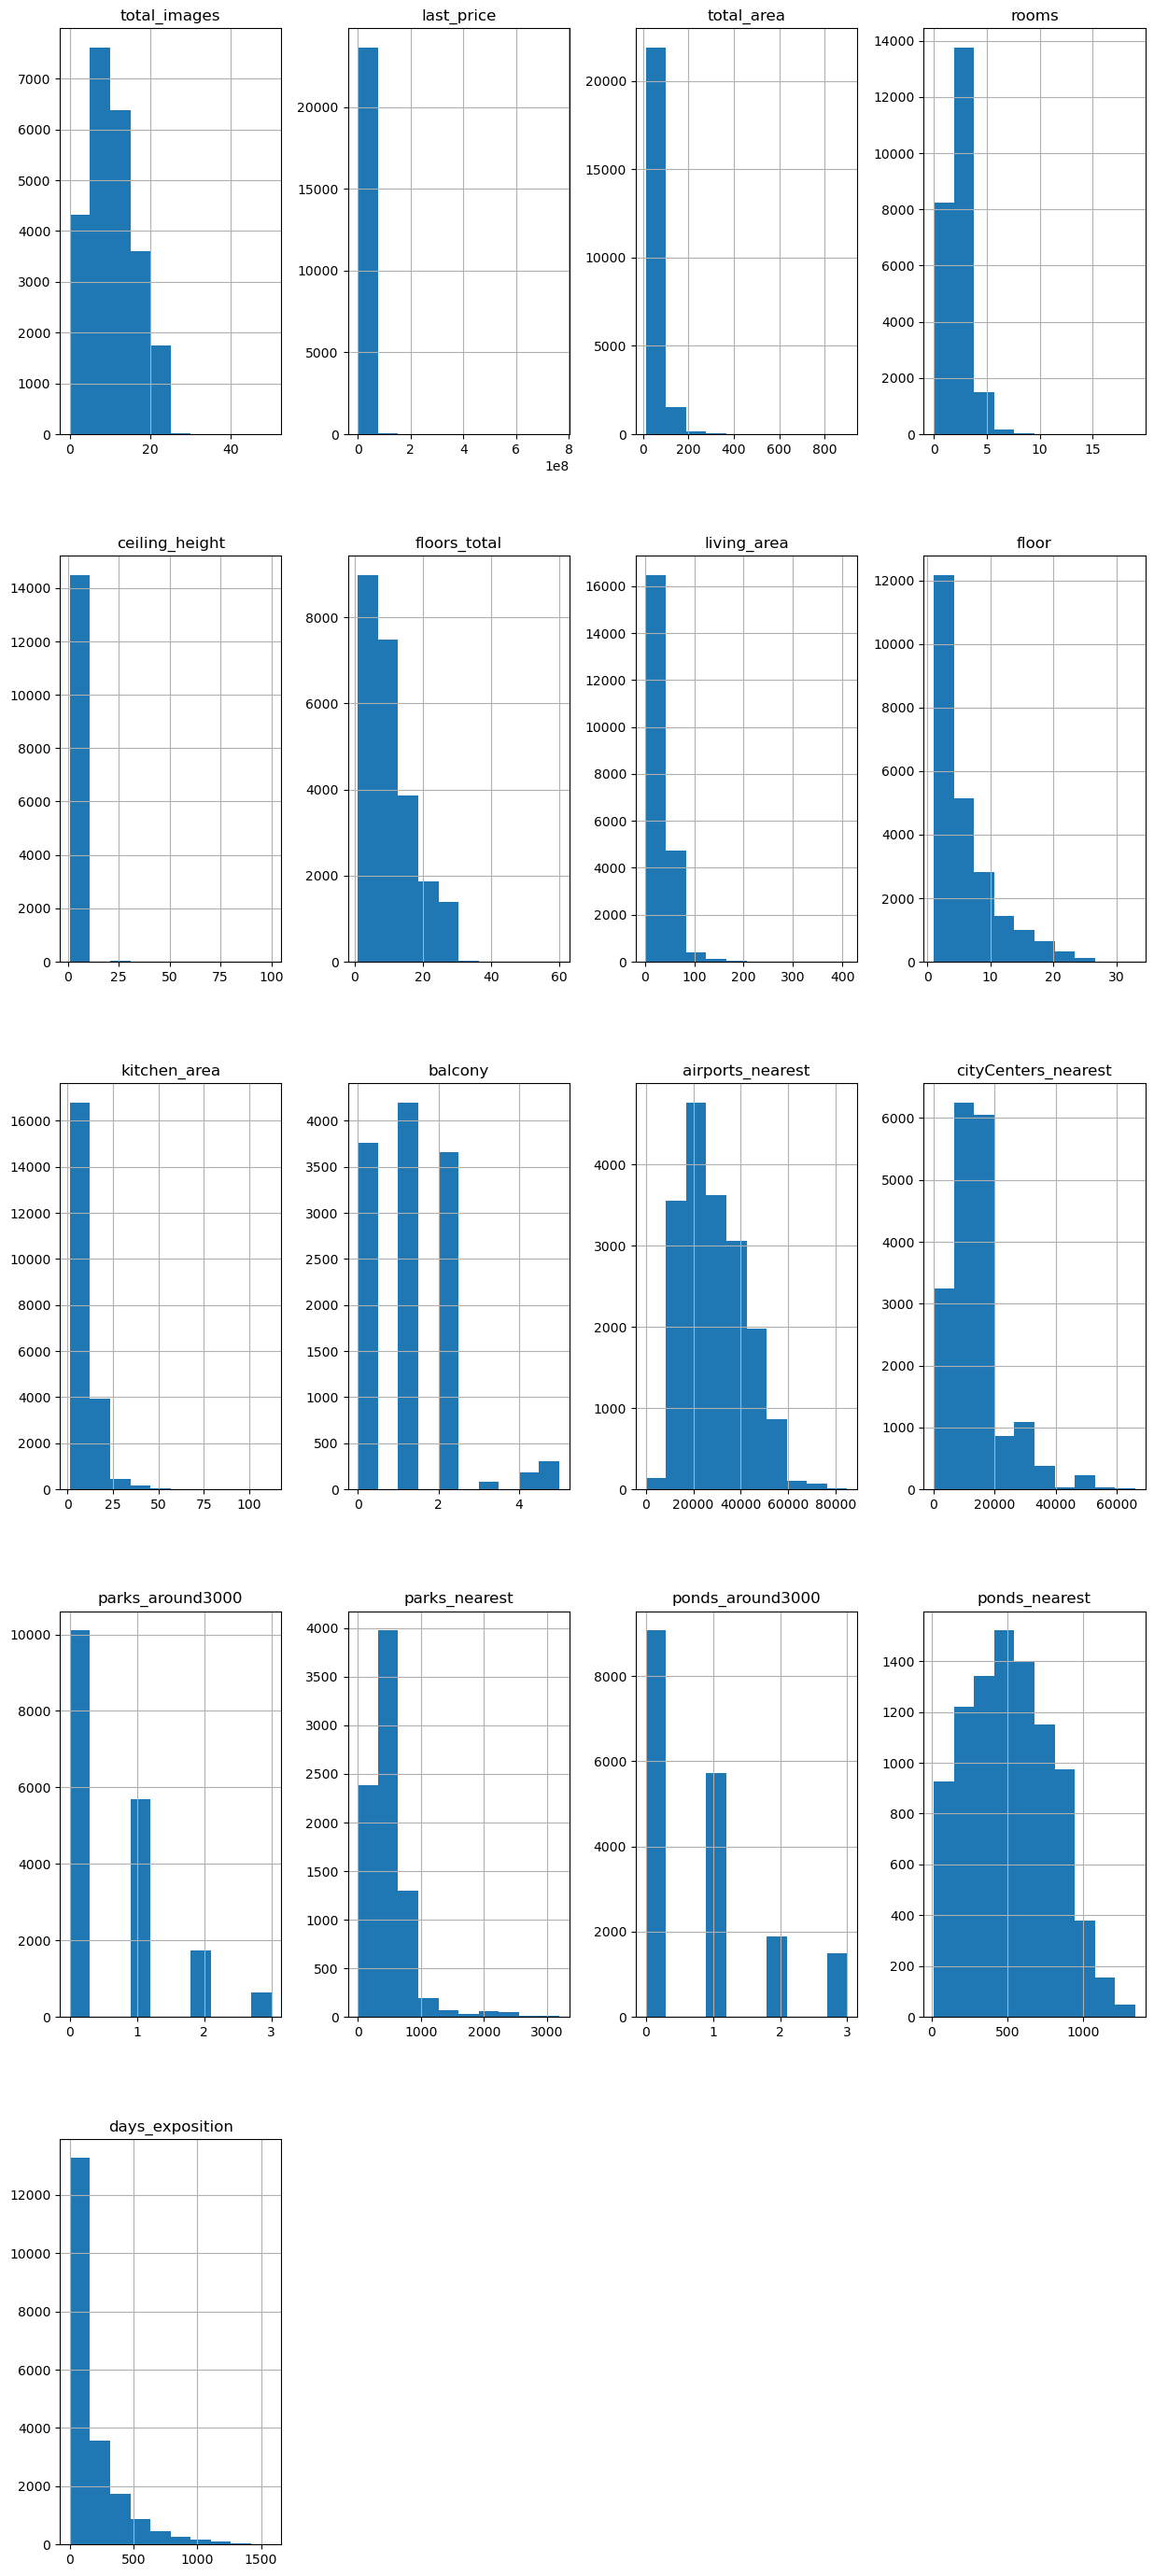

In [7]:
data.hist(figsize=(15, 35))

**Вывод по общей информации:**

1. В представленной таблице 23699 записей, много столбцов, которые имеют пропуски и неверный тип данных.


2. Отметим столбцы, на которые следует обратить внимание на предобработке данных: 
- first_day_exposition - пропусков нет, однако тип данных должен быть datetime  
- ceiling_height - присутствуют пропуски и аномальные значения
- floors_total - присутствуют пропуски и тип данных должен быть int
- living_area - присутствуют пропуски 
- is_apartment - присутствуют пропуски       
- kitchen_area - присутствуют пропуски  
- balcony - присутствуют пропуски
- locality_name - присутствуют пропуски   
- airports_nearest - присутствуют пропуски, расстояние указано в метрах, переводим в целочисленный формат     
- cityCenters_nearest - некорректное название столбца, также присутствуют пропуски, расстояние указано в метрах, переводим в целочисленный формат 
- parks_around3000 - присутствуют пропуски, так как это число парков, то оно должно соответсвовать int
- parks_nearest - присутствуют пропуски, расстояние указано в метрах, переводим в целочисленный формат
- ponds_around3000 - присутствуют пропуски, так как это число водоёмов, то оно должно соответсвовать int
- ponds_nearest - присутствуют пропуски, расстояние указано в метрах, переводим в целочисленный формат
- days_exposition - присутствуют пропуски, также данный столбце должен соответствовать тпу данных int, так как это количество дней

### Выполните предобработку данных

Найдите и изучите пропущенные значения в столбцах:
Определите, в каких столбцах есть пропуски.


Заполните пропущенные значения там, где это возможно. Например, если продавец не указал число балконов, то, скорее всего, в его квартире их нет. Такие пропуски можно заменить на число 0. Если логичную замену предложить невозможно, то оставьте пропуски. 


Пропущенные значения — тоже важный сигнал, который нужно учитывать.
В ячейке с типом markdown укажите причины, которые могли привести к пропускам в данных.


Рассмотрите типы данных в каждом столбце:
Найдите столбцы, в которых нужно изменить тип данных.
Преобразуйте тип данных в выбранных столбцах.
В ячейке с типом markdown поясните, почему нужно изменить тип данных.


Изучите уникальные значения в столбце с названиями и устраните неявные дубликаты. Например, «поселок Рябово» и «поселок городского типа Рябово», «поселок Тельмана» и «посёлок Тельмана» — это обозначения одних и тех же населённых пунктов. Вы можете заменить названия в существующем столбце или создать новый с названиями без дубликатов.

# 1.1 Работа с названием столбцов

Для начала посмотрим на названия столбцов датафрейма

In [8]:
data.columns

Index(['total_images', 'last_price', 'total_area', 'first_day_exposition',
       'rooms', 'ceiling_height', 'floors_total', 'living_area', 'floor',
       'is_apartment', 'studio', 'open_plan', 'kitchen_area', 'balcony',
       'locality_name', 'airports_nearest', 'cityCenters_nearest',
       'parks_around3000', 'parks_nearest', 'ponds_around3000',
       'ponds_nearest', 'days_exposition'],
      dtype='object')

Видим, что лишних пробелов в названиях нет, но стоит изменить название столбца **cityCenters_nearest**

In [9]:
data.rename(columns={'cityCenters_nearest': 'city_centers_nearest'}, inplace=True)

In [10]:
data.columns

Index(['total_images', 'last_price', 'total_area', 'first_day_exposition',
       'rooms', 'ceiling_height', 'floors_total', 'living_area', 'floor',
       'is_apartment', 'studio', 'open_plan', 'kitchen_area', 'balcony',
       'locality_name', 'airports_nearest', 'city_centers_nearest',
       'parks_around3000', 'parks_nearest', 'ponds_around3000',
       'ponds_nearest', 'days_exposition'],
      dtype='object')

Рассмотрим процент пропусков данных по каждомустолбцу

In [11]:
data_missing_percentage = data.isna().sum() * 100 / len(data) 
data_missing = pd.DataFrame({'column_name': data.columns, 'missing_percentage': data_missing_percentage})
data_missing

,column_name,missing_percentage
total_images,total_images,0.000000
last_price,last_price,0.000000
total_area,total_area,0.000000
first_day_exposition,first_day_exposition,0.000000
rooms,rooms,0.000000
ceiling_height,ceiling_height,38.799105
floors_total,floors_total,0.362885
living_area,living_area,8.029875
floor,floor,0.000000
is_apartment,is_apartment,88.290645


####  first_day_exposition - дата публикации

Для начала разберемся со столбцом **first_day_exposition**, который должен отображать дату публикации, но он также показывает время, которое по сути не было указано, поэтому оставим только дату.

In [12]:
data['first_day_exposition'] = pd.to_datetime(data['first_day_exposition'], format='%Y-%m-%dT%H:%M:%S')
data['first_day_exposition'].value_counts()

first_day_exposition
2018-02-01    368
2017-11-10    240
2017-10-13    124
2017-09-27    111
2018-03-26     97
             ... 
2018-05-20      1
2015-05-15      1
2015-01-12      1
2015-12-19      1
2015-07-19      1
Name: count, Length: 1491, dtype: int64

In [13]:
data['first_day_exposition'].dtypes

dtype('<M8[ns]')

####  ceiling_height -  высота потолков

Далее рассмотрим столбец, в котором находится информация о высоте потолков. Здесь присутствует почти 39% пропусков и аномальные значения. Сегодня минимальной нормой в России считается высота потолка 2,4 метра. В новостройках обычно это значение находится в пределах 2,5-2,7 метра. Для элитного жилья показатель может превышать 3 метра и в самых редких случаях доходит до 10.
Поэтому рассмотрим выбросы, разбив значения по категориям.

In [14]:
def categorize_ceiling_height(ceiling):
    try:
        if 0 <= ceiling < 2:
            return 'от 0 до 2'
        elif 2 <= ceiling <= 10:
            return 'от 2.4 до 10'
        elif 10.1 <= ceiling <= 100:
            return 'от 10.1 до 100'
    except:
        pass

In [15]:
category_series = data['ceiling_height'].apply(categorize_ceiling_height)
category_series.groupby(category_series).count()

ceiling_height
от 0 до 2             3
от 10.1 до 100       25
от 2.4 до 10      14476
Name: ceiling_height, dtype: int64

К аномальным значениям вернемся чуть позже. Пока что расмотрим количество пропусков в этом столбце.

In [16]:
data['ceiling_height'].isna().sum()

9195

Я считаю, что в этом случае можно будет заполнить пропуски медианой, так как она соответствует среднему значению высоты потолков, на сегодняшнем рынке недвижимости.

In [17]:
data['ceiling_height'] = data['ceiling_height'].fillna(data['ceiling_height'].mean())

In [18]:
data.isna().sum()

total_images                0
last_price                  0
total_area                  0
first_day_exposition        0
rooms                       0
ceiling_height              0
floors_total               86
living_area              1903
floor                       0
is_apartment            20924
studio                      0
open_plan                   0
kitchen_area             2278
balcony                 11519
locality_name              49
airports_nearest         5542
city_centers_nearest     5519
parks_around3000         5518
parks_nearest           15620
ponds_around3000         5518
ponds_nearest           14589
days_exposition          3181
dtype: int64

####  floors_total - всего этажей в доме

Для начала рассмотрим количество пропусков.

In [19]:
data['floors_total'].isna().sum()

86

In [20]:
data['floors_total'].median()

9.0

Число пропусков в столбце крайне невелико - можно удалить без потери качества данных.

In [21]:
data.dropna(subset=['floors_total'], inplace=True)

In [22]:
data['floors_total'].isna().sum()

0

Видим, что пропусков не осталось

In [23]:
data['city_centers_nearest'].describe()

count    18104.000000
mean     14185.084015
std       8614.132292
min        181.000000
25%       9233.750000
50%      13093.000000
75%      16287.000000
max      65968.000000
Name: city_centers_nearest, dtype: float64

In [24]:
def category_centre(distance):
    if distance < 2000:
        return 'центр'
    elif distance < 5000:
        return 'в пределах центра'
    elif distance < 17000:
        return 'в пределах города'
    else:
        return 'область'

In [25]:
data['category_from_centers'] = data['city_centers_nearest'].apply(category_centre)

Изменим тип данных столбца floors_total на int, так как количество этажей не может быть числом с плавующей запятой

In [26]:
data['floors_total'] = data['floors_total'].astype(int)

In [27]:
data['floors_total'].dtype

dtype('int32')

#### is_apartment — апартаменты

Рассмотрим пропуски в столбце is_apartment

In [28]:
data['is_apartment'].isna().sum()

20838

Количество пропусков довольно большое, этому могло послужить неверное заполнение данных пользователем, так как не все знают, что существует такой тип жилья, также пользоваетль мог просто не заполнять эти данные, подразумевая, что жильё не является апартаментами. Поэтому рассмотрим какие значения присутвтуют в данном столбце.

In [29]:
data['is_apartment'].value_counts()

is_apartment
False    2725
True       50
Name: count, dtype: int64

Я считаю, что в этом случае можно заполнить нулевые значения как False, также нужно изменить тип данных в столбце на bool.

In [30]:
data['is_apartment'] = data['is_apartment'].fillna(False)
data['is_apartment'].isna().sum()

0

In [31]:
data['is_apartment'] = data['is_apartment'].astype(bool)

#### balcony - количество балконов

In [32]:
data['balcony'].isna().sum()

11480

В этом случае пользователи могли пропускать пункт о количестве балконов, поэтому появилось большое количество пропусков. Предлагаю заполнить их "0".

In [33]:
data['balcony'] = data['balcony'].fillna(0) 
data['balcony'].isna().sum()

0

Также изменим тип данных на int, так как число балконов не может быть числом с плавающей запятой.

In [34]:
data['balcony'] = data['balcony'].astype(int)

#### locality_name — название населённого пункта

In [35]:
data['locality_name'].isna().sum()

48

Видим, что пропусков немного, возможно пользователь не указывал расположение из-за того, что вводил конкретный запрос для продажи в определенном населенном пункте и думал, что значение расположение будет указано автоматически. Удалим пропуски, так как это не скажется на качестве данных.

In [36]:
data.dropna(subset=['locality_name'], inplace=True)

In [37]:
data['locality_name'].isna().sum()

0

In [38]:
data['locality_name'].sort_values().unique()

array(['Бокситогорск', 'Волосово', 'Волхов', 'Всеволожск', 'Выборг',
       'Высоцк', 'Гатчина', 'Зеленогорск', 'Ивангород', 'Каменногорск',
       'Кингисепп', 'Кириши', 'Кировск', 'Колпино', 'Коммунар',
       'Красное Село', 'Кронштадт', 'Кудрово', 'Лодейное Поле',
       'Ломоносов', 'Луга', 'Любань', 'Мурино', 'Никольское',
       'Новая Ладога', 'Отрадное', 'Павловск', 'Петергоф', 'Пикалёво',
       'Подпорожье', 'Приморск', 'Приозерск', 'Пушкин', 'Санкт-Петербург',
       'Светогорск', 'Сертолово', 'Сестрорецк', 'Сланцы', 'Сосновый Бор',
       'Сясьстрой', 'Тихвин', 'Тосно', 'Шлиссельбург',
       'городской поселок Большая Ижора', 'городской поселок Янино-1',
       'городской посёлок Будогощь', 'городской посёлок Виллози',
       'городской посёлок Лесогорский', 'городской посёлок Мга',
       'городской посёлок Назия', 'городской посёлок Новоселье',
       'городской посёлок Павлово', 'городской посёлок Рощино',
       'городской посёлок Свирьстрой', 'городской посёлок Совет

Проанализировав уникальные значения в столбце **locality_name**, можно выполнить следующие шаги:

Во-первых, стоит заменить "ё" на "е".

Во-вторых, нужно оставить только названия населенных пунктов, для того, чтобы можно было проводить корректную группировку по населённым пунктам.

In [39]:
len(data['locality_name'].unique())

364

In [40]:
def change_locality_name(row):
    row_name = row.replace('ё', 'е')
    if 'городской поселок ' in row_name:
        new_row = row_name.replace('городской поселок ', '')
        return new_row
    elif 'поселок городского типа ' in row_name:
        new_row = row_name.replace('поселок городского типа ', '')
        return new_row
    elif 'коттеджный поселок' in row_name:
        new_row = row_name.replace('коттеджный поселок ', '')
        return new_row
    elif 'поселок при железнодорожной станции ' in row_name:
        new_row = row_name.replace('поселок при железнодорожной станции ', '')
        return new_row
    elif 'поселок станции ' in row_name:
        new_row = row_name.replace('поселок станции ', '')
        return new_row
    elif 'поселок ' in row_name:
        new_row = row_name.replace('поселок ', '')
        return new_row
    elif 'село ' in row_name:
        new_row = row_name.replace('село ', '')
        return new_row
    elif 'деревня ' in row_name:
        new_row = row_name.replace('деревня ', '')
        return new_row
    elif 'садоводческое некоммерческое товарищество ' in row_name:
        new_row = row_name.replace('садоводческое некоммерческое товарищество ', '')
        return new_row
    elif 'садовое товарищество ' in row_name:
        new_row = row_name.replace('садовое товарищество ', '')
        return new_row
    return row_name


In [41]:
data['purified_locality_name'] = data['locality_name'].apply(change_locality_name)

In [42]:
data['purified_locality_name'].sort_values().unique()

array(['Агалатово', 'Александровская', 'Алексеевка', 'Аннино', 'Аро',
       'Барышево', 'Батово', 'Бегуницы', 'Белогорка', 'Белоостров',
       'Бокситогорск', 'Большая Вруда', 'Большая Ижора',
       'Большая Пустомержа', 'Большие Колпаны', 'Большое Рейзино',
       'Большой Сабск', 'Бор', 'Борисова Грива', 'Бугры', 'Будогощь',
       'Ваганово', 'Важины', 'Вартемяги', 'Вахнова Кара', 'Вещево',
       'Виллози', 'Вознесенье', 'Возрождение', 'Войсковицы', 'Войскорово',
       'Володарское', 'Волосово', 'Волхов', 'Всеволожск', 'Выборг',
       'Вырица', 'Выскатка', 'Высокоключевой', 'Высоцк', 'Гаврилово',
       'Гарболово', 'Гатчина', 'Гладкое', 'Глажево', 'Глебычево',
       'Глинка', 'Гончарово', 'Горбунки', 'Гостилицы', 'Громово',
       'Дзержинского', 'Дружная Горка', 'Дружноселье', 'Дубровка',
       'Елизаветино', 'Ефимовский', 'Жилгородок', 'Жилпоселок', 'Житково',
       'Заводской', 'Заклинье', 'Заневка', 'Запорожское', 'Зеленогорск',
       'Зимитицы', 'Ивангород', 'Извара'

In [43]:
len(data['purified_locality_name'].unique())

305

#### airports_nearest, city_centers_nearest, parks_around3000, parks_nearest ,ponds_around3000, ponds_neares, days_exposition

Пропуски в столбцах airports_nearest, city_centers_nearest, parks_around3000, parks_nearest ,ponds_around3000, ponds_neares, days_exposition трогать не будем, так как эти данные получены автоматически на основе картографических данных, мы не знаем принципа получения данных, а заполнять их средним или медианой некорректно для исследования. 

In [44]:
data[['airports_nearest', 'city_centers_nearest', 'parks_around3000', 'parks_nearest', 'ponds_around3000', 'ponds_nearest', 'days_exposition']].dtypes

airports_nearest        float64
city_centers_nearest    float64
parks_around3000        float64
parks_nearest           float64
ponds_around3000        float64
ponds_nearest           float64
days_exposition         float64
dtype: object

In [45]:
missing_values_by_year = data[data['days_exposition'].isnull()].groupby(data['first_day_exposition'].dt.year).size()

In [46]:
missing_values_by_year

first_day_exposition
2014      18
2015      70
2016      67
2017     271
2018     957
2019    1788
dtype: int64

Исходя из предоставленных данных о количестве пропусков в столбце days_exposition относительно года выставления квартиры на продажу, мы можем сделать следующие выводы:

В 2014 году было всего 18 пропусков.
Количество пропусков начинает расти с 2015 года и достигает пика в 2019 году.
Это неравномерное распределение пропусков может указывать на то, что данные пропуски не случайны и могут быть связаны с какими-то особенностями или изменениями в процессе сбора данных или самих данных. Например, в 2019 году может быть изменение в методах или инструментах сбора информации, что привело к более частым пропускам.

Поэтому можно сделать предположение, что данные пропуски в столбце days_exposition не являются случайными и могут быть обусловлены определенными факторами, требующими дополнительного анализа и проверки.

#### living_area и kitchen_area

Рассмотрим пропуски в столбце living_area и kitchen_area

In [47]:
data['living_area'].isna().sum()

1865

In [48]:
data['kitchen_area'].isna().sum()

2222

Заполнять нулевые значения медианой не стоит, так как в разных населенных пунктах бывает совершенно разная жилая площадь и площаь кухни. Но также возможно эти значения пропущены для такого типа квартир как "студия". Проверим теорию. 

In [49]:
data.query('rooms == 0')[['living_area', 'kitchen_area']].isna().sum()

living_area      11
kitchen_area    194
dtype: int64

Теория не подтвердилась, я считаю, что лучше не заполнять пропуски, так как это может сильно повлиять на результаты.

#### Дубликаты

Рассмотрим имеет ли датафрейм явные дубликаты, если они есть, то удалим их. 

In [50]:
data.duplicated().sum()

0

Дубликатов в данном датафрейме не было выявлено.

**Вывод по предобработке данных:**

1. Было изменено некорректное название столбца, в котором находится информация о расстоянии до центра города (с cityCenters_nearest на city_centers_nearest)

2. Были изменены типы данных у следующих столбцов:

- floors_total с float на int, так ка число этажей не может быть числом с плавающей запятой.

- is_apartment с int на bool

- first_day_exposition - был преведен к формату даты и убрано время

- balcony - изменил с float на int, так как число балконов должно быть целым числом.

- airports_nearest, city_сenters_nearest, parks_around3000, parks_nearest, ponds_around3000, ponds_nearest, days_exposition - перевел в целочисленный формат, так как количество должно быть целым число и расстояния указаны в метрах. 

3. Были обработаны пропуски у следующих столбцов:

- ceiling_height - пропуски были заменены на медиану, так как она соответствует среднему значению высоты потолков, на сегодняшнем рынке недвижимости.

- is_apartment - пропуски были заменены на False, так как не все знают, что существует такой тип жилья, также пользоваетль мог просто не заполнять эти данные, подразумевая, что жильё не является апартаментами.

- balcony - пропуски были заменены на "0", в этом случае пользователи могли пропускать пункт о количестве балконов, потому что у них их нет.

- locality_name - пропусков было немного, они были заменены на "Не указан".

- Пропуски в столбцах airports_nearest, city_centers_nearest, parks_around3000, parks_nearest ,ponds_around3000, ponds_neares, days_exposition можно заменить нулями, и не использовать их при исследовании, так как эти данные получены автоматически на основе картографических данных, мы не знаем принципа получения данных, а заполнять их средним или медианой некорректно для исследования.

4. Дубликаты:

- Были заменены неявные дубликаты в столбце locality_name.

- Явных дубликатов не было выявлено.

### Добавьте в таблицу новые столбцы

В данном разделе будут добавлены следующие столбцы:

- цена одного квадратного метра (нужно поделить стоимость объекта на его общую площадь, а затем округлить до двух знаков после запятой);

- день недели публикации объявления (0 — понедельник, 1 — вторник и так далее);

- месяц публикации объявления;

- год публикации объявления;

- тип этажа квартиры (значения — «‎первый», «последний», «другой»);

- расстояние до центра города в километрах (переведите из *м* в *км* и округлите до ближайших целых значений).

#### Цена одного квадратного метра

In [51]:
data['price_square_meter'] = (data['last_price'] / data['total_area']).round(2) # нужно поделить стоимость объекта на его общую площадь, а затем округлить до двух знаков после запятой

In [52]:
data['price_square_meter']

0        120370.37
1         82920.79
2         92785.71
3        408176.10
4        100000.00
           ...    
23694     72490.85
23695     52542.37
23696     44091.71
23697    149511.40
23698     41795.67
Name: price_square_meter, Length: 23565, dtype: float64

#### День недели публикации объявления

In [53]:
data['weekday'] = data['first_day_exposition'].dt.weekday

In [54]:
data['weekday'].dtype

dtype('int32')

In [55]:
data['weekday'].sort_values().unique()

array([0, 1, 2, 3, 4, 5, 6])

#### Месяц публикации объявления

In [56]:
data['month'] = data['first_day_exposition'].dt.month

In [57]:
data['month'].dtype

dtype('int32')

In [58]:
data['month'].sort_values().unique()

array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12])

#### Год публикации объявления

In [59]:
data['year'] = data['first_day_exposition'].dt.year

In [60]:
data['year'].dtype

dtype('int32')

In [61]:
data['year'].sort_values().unique()

array([2014, 2015, 2016, 2017, 2018, 2019])

#### Тип этажа квартиры

In [62]:
def floor_category(floor, floors_total):
    if floor == 1:
        return 'первый'
    elif floor == floors_total:
        return 'последний'
    else:
        return 'другой'

In [63]:
data['floor_type'] = data.apply(lambda row: floor_category(row['floor'], row['floors_total']), axis=1)

In [64]:
data['floor_type'].unique()

array(['другой', 'первый', 'последний'], dtype=object)

#### Расстояние до центра города в километрах

In [65]:
data['city_сenter_km'] = (data['city_centers_nearest'] / 1000).round(0)

In [66]:
data['city_сenter_km'].dtype

dtype('float64')

In [67]:
data['city_сenter_km'].unique()

array([16., 19., 14.,  7.,  8., nan, 12., 15., 52., 33., 31., 11., 13.,
       10.,  2., 32.,  4., 17., 30.,  5., 51., 50., 24., 18.,  9., 28.,
        3.,  6., 27., 21., 49., 35., 36., 34.,  1., 29., 26., 53., 22.,
       55., 20., 23., 25.,  0., 66., 47., 40., 57., 37., 41., 43., 48.,
       62., 60., 39., 42., 65., 54., 59., 45., 61., 63.])

**Итоги.** Были добавлены следующие столбцы:

- price_square_meter - Цена одного квадратного метра, тип данных float

- weekday - День недели публикации объявления (0 — понедельник, 1 — вторник и так далее), тип данных int

- month - Месяц публикации объявления, тип данных int

- year - Год публикации объявления, тип данных int

- floor_type - Тип этажа квартиры (значения — «первый», «последний», «другой»), тип данных object

- city_сenter_km - Расстояние до центра города в километрах, тип данных float

### Проведите исследовательский анализ данных

Для начала изучим следующие параметры:

общая площадь;

жилая площадь;

площадь кухни;

цена объекта;

количество комнат;

высота потолков;

тип этажа квартиры («первый», «последний», «другой»);

общее количество этажей в доме;

расстояние до центра города в метрах;

расстояние до ближайшего парка

#### total_area - общая площадь

In [68]:
filtered_data = data.copy()

In [69]:
data['total_area'].describe()

count    23565.000000
mean        60.322824
std         35.657060
min         12.000000
25%         40.000000
50%         52.000000
75%         69.700000
max        900.000000
Name: total_area, dtype: float64

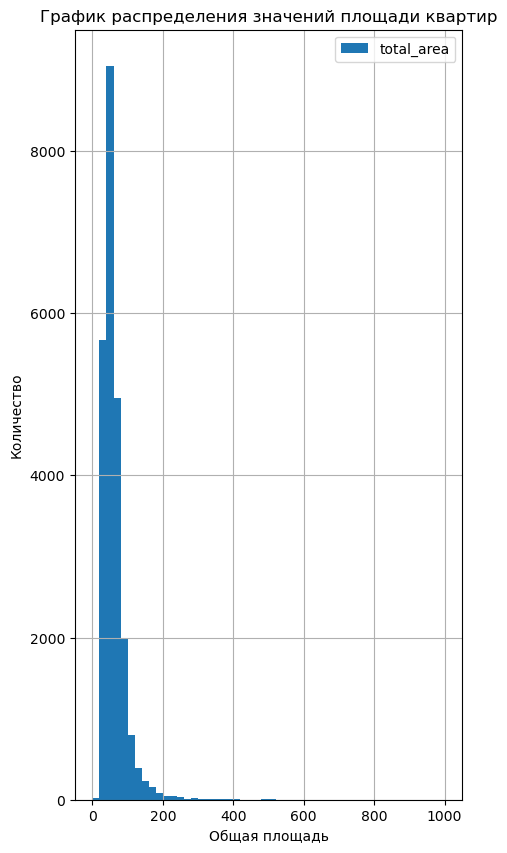

In [70]:
data.plot(y='total_area', kind='hist', bins=50, figsize=(5, 10), grid=True, range=(0,1000))
plt.title('График распределения значений площади квартир')
plt.ylabel('Количество')
plt.xlabel('Общая площадь')
plt.show()

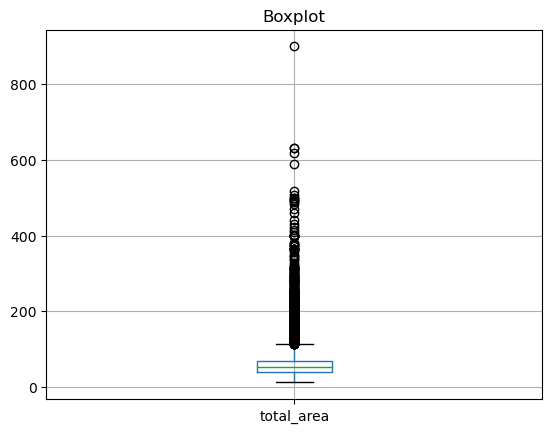

In [71]:
data.boxplot(column='total_area')
plt.title('Boxplot')
plt.show()

Максимальное значение общей площади составляет 900 кв.м. (выглядит как выброс, возможно пользователь не указал разрядность), минимальное 12 кв.м., среднее значение похоже на реальное и составляет 60 кв.м., медиана равняет 52 кв.м., разброс значений в выборке относительно их среднего значения не очень большой. Величины в выборке находятся в пределах примерно плюс-минус 35.65 единиц от среднего значения. 

В целом распределение похоже на Пуассона, основная часть данных находится до 100 кв.м после начинает снижаться и на ящике с усами выше 100 видны выбросы, но общая площадь бывает более 100 кв.м. поэтому основываясь на гистограмме уберем площади, которые превышают 200 кв.м., чтобы не исказить выборку. 
Возможно пользователь указал неверную разрядность, но на рынке недвижимости встречаются квартиры, у которых общая площадь превышает 200 кв.м..

In [72]:
data.query('total_area <= 200')['total_area'].describe()

count    23339.000000
mean        58.150947
std         26.512526
min         12.000000
25%         40.000000
50%         51.700000
75%         68.800000
max        200.000000
Name: total_area, dtype: float64

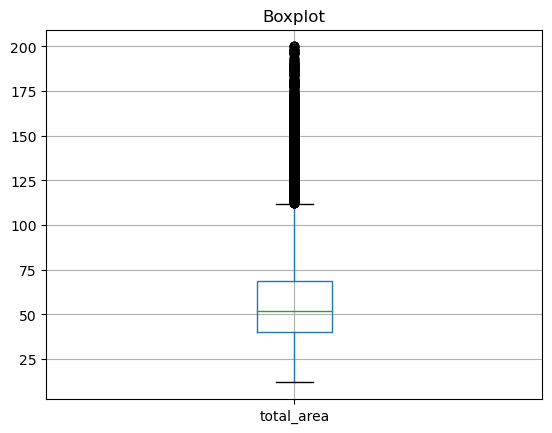

In [73]:
data.query('total_area <= 200').boxplot(column='total_area')
plt.title('Boxplot')
plt.show()

In [74]:
data.loc[data['total_area'] <= 150, 'clear_total_area'] = data['total_area']

#### Жилая площадь

In [75]:
data['living_area'].describe()

count    21700.000000
mean        34.454822
std         22.045359
min          2.000000
25%         18.600000
50%         30.000000
75%         42.300000
max        409.700000
Name: living_area, dtype: float64

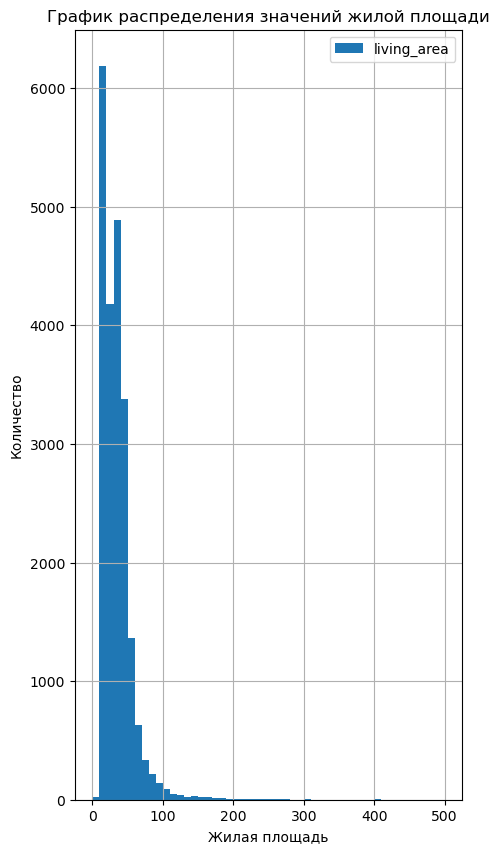

In [76]:
data.plot(y='living_area', kind='hist', bins=50, figsize=(5, 10), grid=True, range=(0,500))
plt.title('График распределения значений жилой площади')
plt.xlabel('Жилая площадь')
plt.ylabel('Количество')
plt.show()

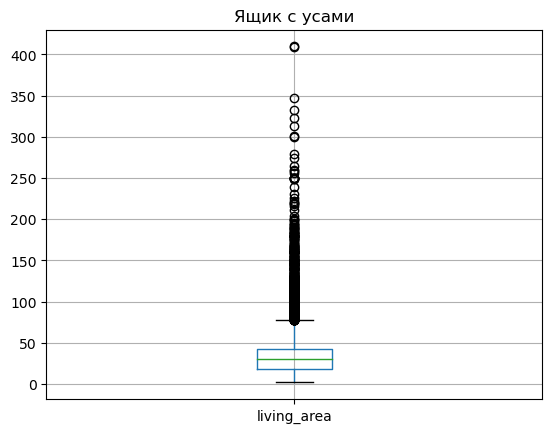

In [77]:
data.boxplot(column='living_area')
plt.title('Ящик с усами')
plt.show()

Минимальное значение жилой площади составляет 2 кв.м., максимальное значение 409 кв.м., среднее значение равняется 34 кв.м., что отражает реальную картину, так как на сегодняшний день в среднем на одного человека приходится 33 кв.м. жилой площади, медиана равна 30 кв.м., стандартное отклонение составляет 22, что говорит о относительно небольшом разбросе данных. Основные значения жилой площади расположились до 80 кв.м., дальше убывают, распределение похоже на распределение Пуасона. 

На ящике с усами видно большое количество выбросов, однако существуют квартиры с жилой площадью более 80 кв.м. Как и в случае с общей площадью рассмотрим гистограмму, на которой видно, что значения сильно уменьшаются после 100 кв.м.,  аккуратно обработаем значения и удалим те, которые превышают 100 кв.м.

In [78]:
data.query('living_area <= 150')['living_area'].describe()

count    21581.000000
mean        33.565823
std         18.165578
min          2.000000
25%         18.600000
50%         30.000000
75%         42.000000
max        150.000000
Name: living_area, dtype: float64

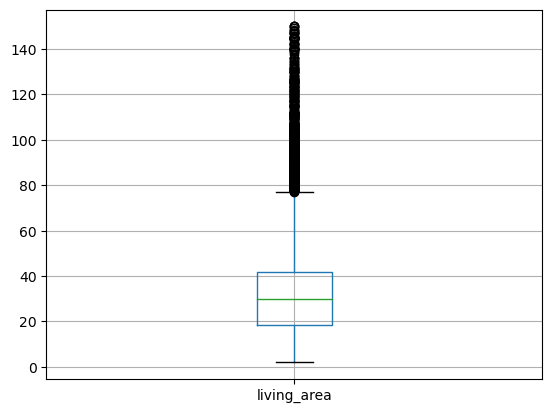

In [79]:
data.query('living_area <= 150').boxplot(column='living_area')
plt.show()

In [80]:
data.loc[data['living_area'] <= 150, 'clear_living_area'] = data['living_area']

#### Площадь кухни

In [81]:
data['kitchen_area'].describe()

count    21343.000000
mean        10.560994
std          5.900630
min          1.300000
25%          7.000000
50%          9.100000
75%         12.000000
max        112.000000
Name: kitchen_area, dtype: float64

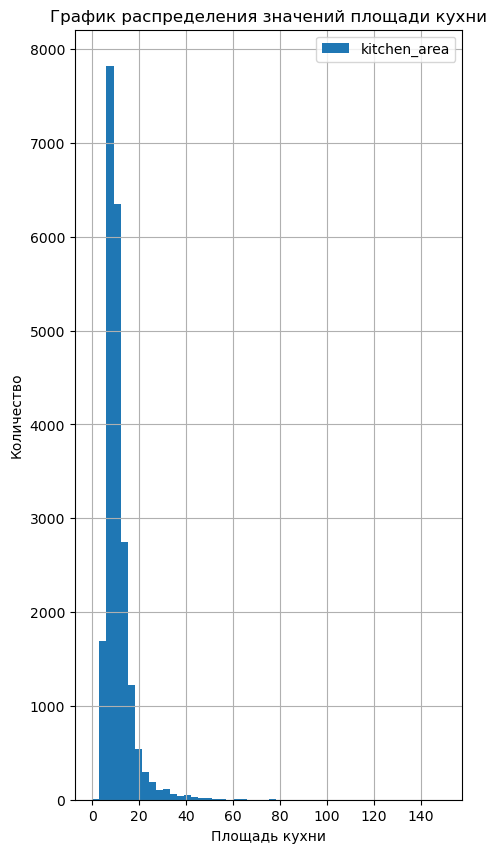

In [82]:
data.plot(y='kitchen_area', kind='hist', bins=50, figsize=(5, 10), grid=True, range=(0, 150))
plt.title('График распределения значений площади кухни')
plt.xlabel('Площадь кухни')
plt.ylabel('Количество')
plt.show()

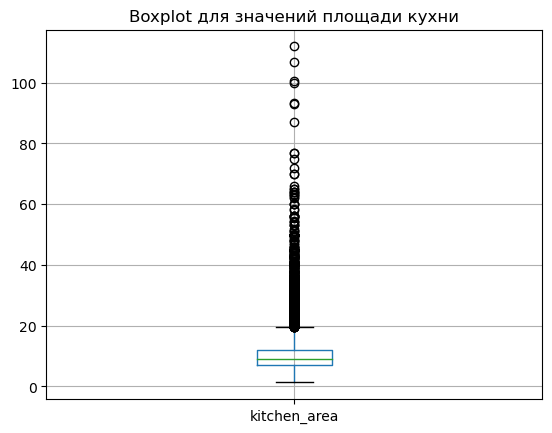

In [83]:
data.boxplot(column='kitchen_area')
plt.title('Boxplot для значений площади кухни')
plt.show()

Максимальное значение площади кухни равняется 112 кв.м., мнимальное значение 1,3 кв.м., среднее значение равняется 10,5 кв.м., а медиана 9,1 кв.м. Стандартное отклонение небольшое, поэтому выбросов не так много. Основные значения расположились от 0 до 20 кв.м., затем видно снижение, распределение похоже на распределение Пуассона. 

На ящике с усами видим большое количество выбросов более 20 кв.м., однако бывают квартиры с площадью кухни более 20 кв.м., поэтому удалим значения, которые превышают 45 кв.м., основываясь на гистограмме.

In [84]:
data.query('kitchen_area <= 45')['kitchen_area'].describe()

count    21271.000000
mean        10.394255
std          5.090269
min          1.300000
25%          7.000000
50%          9.100000
75%         12.000000
max         45.000000
Name: kitchen_area, dtype: float64

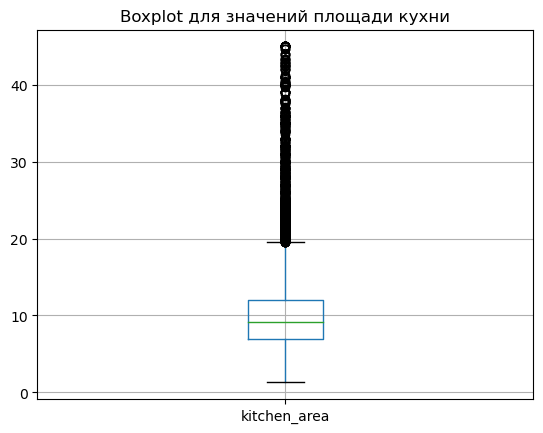

In [85]:
data.query('kitchen_area <= 45').boxplot(column='kitchen_area')
plt.title('Boxplot для значений площади кухни')
plt.show()

In [86]:
data.loc[data['kitchen_area'] <= 150, 'clear_kitchen_area'] = data['kitchen_area']

#### Цена объекта

In [87]:
data['last_price'].describe()

count    2.356500e+04
mean     6.540058e+06
std      1.091093e+07
min      1.219000e+04
25%      3.400000e+06
50%      4.646000e+06
75%      6.790000e+06
max      7.630000e+08
Name: last_price, dtype: float64

In [88]:
data['last_price'].std()

10910934.7215143

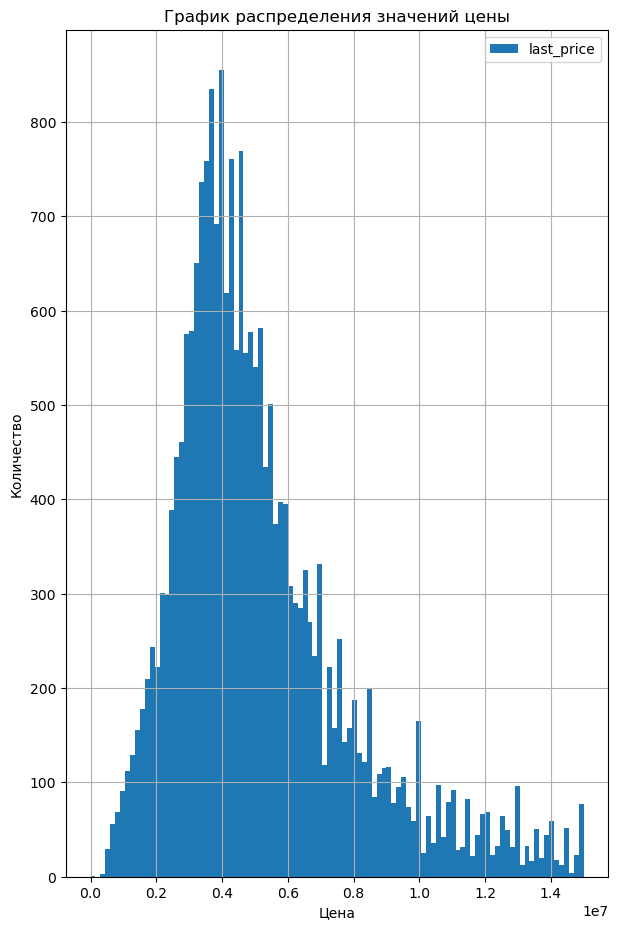

In [89]:
data.plot(y='last_price', kind='hist', bins=100, grid=True, range=(0,15000000), figsize=(7,11))
plt.title('График распределения значений цены')
plt.xlabel('Цена')
plt.ylabel('Количество')
plt.show()

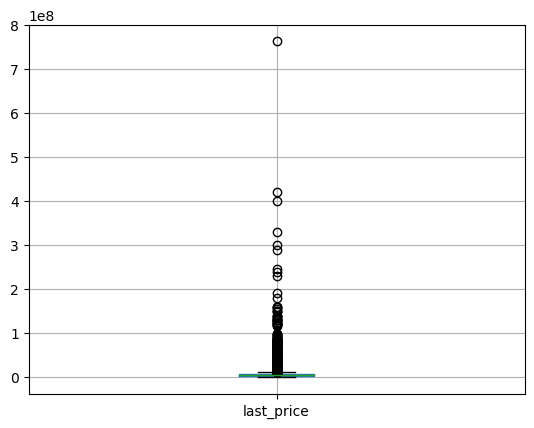

In [90]:
data.boxplot(column='last_price')
plt.show()

Максимальное значение цены составляет 763 000 000, минимальное 12190 (что похоже на аномалию), среднее составляет 6 541 549, медиана равняется 4 650 000. Стандартное отклонение для столбца last_price составляет примерно 10 887 010. Это довольно большое значение, что может указывать на значительный разброс цен между отдельными квартирами. Величины в выборке находятся в пределах 2-х и 7-ми миллионов.

На ящике с усами видно большоее количество выбросов, но цену выставляют пользователи, и зачастаую цена завышена, поэтому обрабатывать такие аномалии не рискну.

#### Количество комнат

In [91]:
data['rooms'].describe()

count    23565.000000
mean         2.070656
std          1.078591
min          0.000000
25%          1.000000
50%          2.000000
75%          3.000000
max         19.000000
Name: rooms, dtype: float64

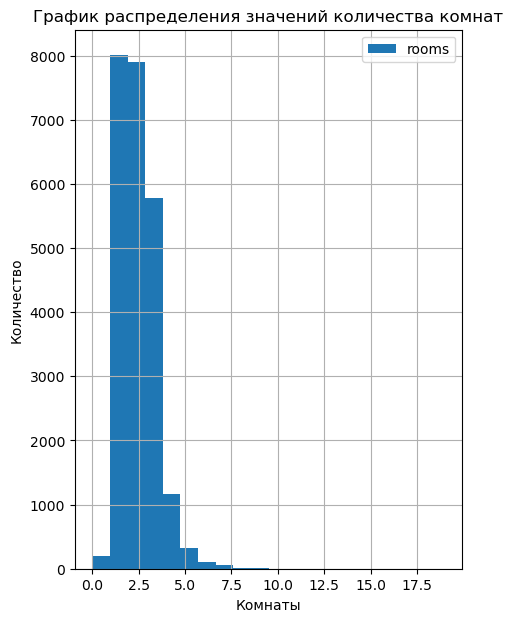

In [92]:
data.plot(y='rooms', kind='hist', bins=20, grid=True, figsize=(5, 7))
plt.title('График распределения значений количества комнат')
plt.xlabel('Комнаты')
plt.ylabel('Количество')
plt.show()

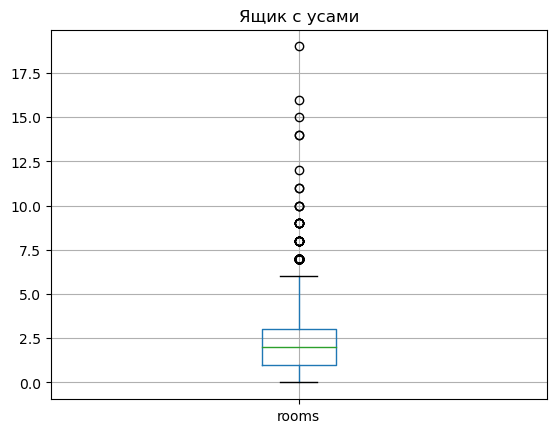

In [93]:
data.boxplot(column='rooms')
plt.title('Ящик с усами')
plt.show()

Максимальное значение комнат 19 (что похоже на выброс), минимальное равно 0 (возможно такой параметр характерен для квартир-студий. В среднем в квартирах 2 комнаты, мидиана равняется 2. Стандартное отклонение небольшое, выбросов не так и много (это подтверждает и boxplot). Большинство значений расположились от 1 до 3 комнат. 

Считаю, что наиболее безопасным решением будет ограничить количество комнат от 0 до 8, так как это значения, которые имеют место быть на рынке недвижимости, особенно в больших городах.

In [94]:
data.query('rooms <= 8')['rooms'].describe()

count    23546.000000
mean         2.063238
std          1.043721
min          0.000000
25%          1.000000
50%          2.000000
75%          3.000000
max          8.000000
Name: rooms, dtype: float64

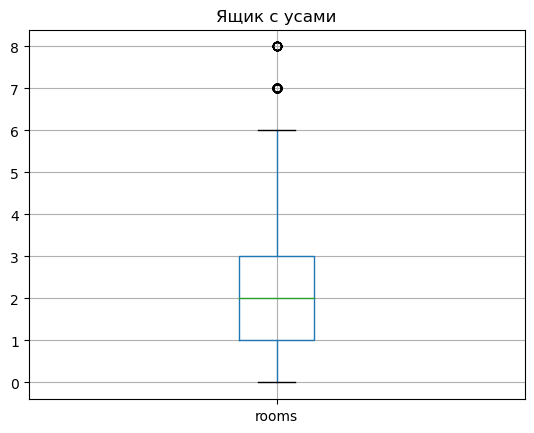

In [95]:
data.query('rooms <= 8').boxplot('rooms')
plt.title('Ящик с усами')
plt.show()

In [96]:
data.loc[data['rooms'] <= 8, 'clear_rooms'] = data['rooms']

#### Высота потолков

In [97]:
data['ceiling_height'].describe()

count    23565.000000
mean         2.771366
std          0.989266
min          1.000000
25%          2.600000
50%          2.771499
75%          2.771499
max        100.000000
Name: ceiling_height, dtype: float64

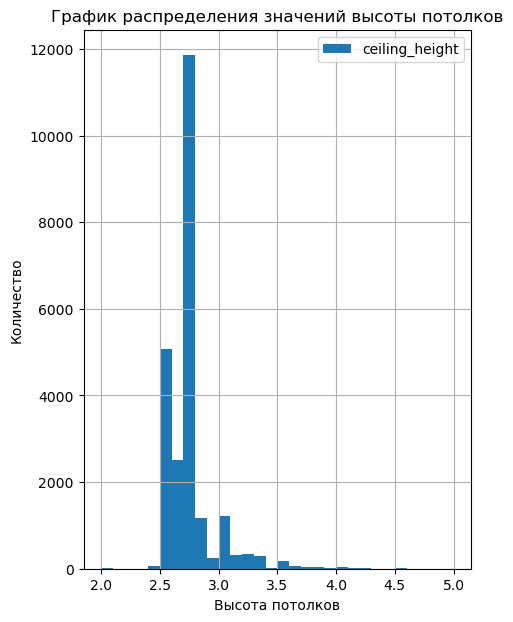

In [98]:
data.plot(y='ceiling_height', kind='hist', bins = 30, range = (2,5), grid=True, figsize = (5,7))
plt.title('График распределения значений высоты потолков')
plt.xlabel('Высота потолков')
plt.ylabel('Количество')
plt.show()

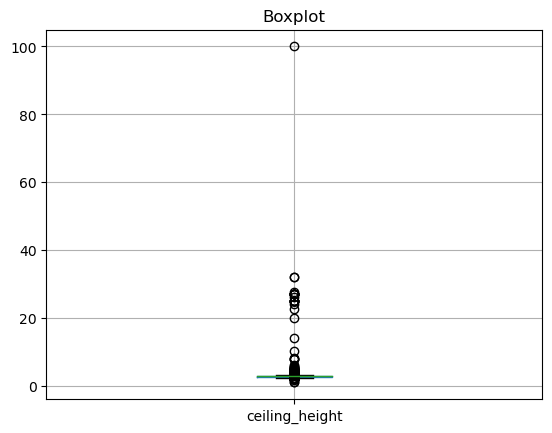

In [99]:
data.boxplot(column='ceiling_height')
plt.title('Boxplot')
plt.show()

Максимальная высота потолков 100 (аномальное значение), минимальная высота 0 (тоже не верится), среднее похоже на правду, так как оно равняет 2,7. В основном значения расположились от 2,5 до 2,8.

Если всё же принять за реальную высоту потолков категорию "от 2.4 до 10", то попробуем избавиться от выбросов. Аномальные значения могли получится из-за ошибок ввода данных пользователем, к примеру могла быть не верно указана разрядность (26 вместо 2.6). Поэтому попробуем сначала поделить все значения, которые больше 10 на 10, а затем удалим выбросы.

In [100]:
filtered_data = data['ceiling_height'].apply(lambda x: x/10 if x > 10 else x)

In [101]:
filtered_data = data[(data['ceiling_height'] >= 2.4) & (data['ceiling_height'] <= 10)]

In [102]:
data['filtered_ceiling_height'] = filtered_data['ceiling_height']

In [103]:
data['filtered_ceiling_height'].describe()

count    23519.000000
mean         2.745266
std          0.229476
min          2.400000
25%          2.600000
50%          2.771499
75%          2.771499
max          8.300000
Name: filtered_ceiling_height, dtype: float64

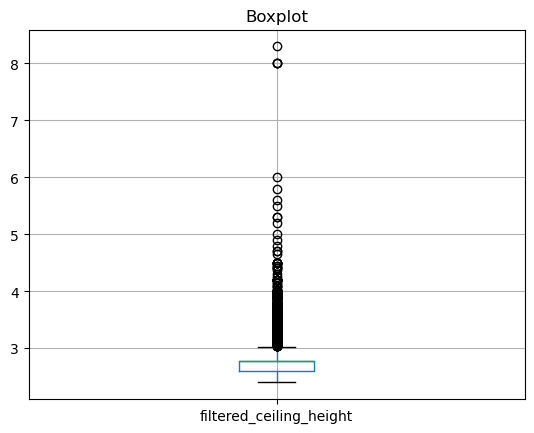

In [104]:
data.boxplot('filtered_ceiling_height')
plt.title('Boxplot')
plt.show()

#### Тип этажа квартиры

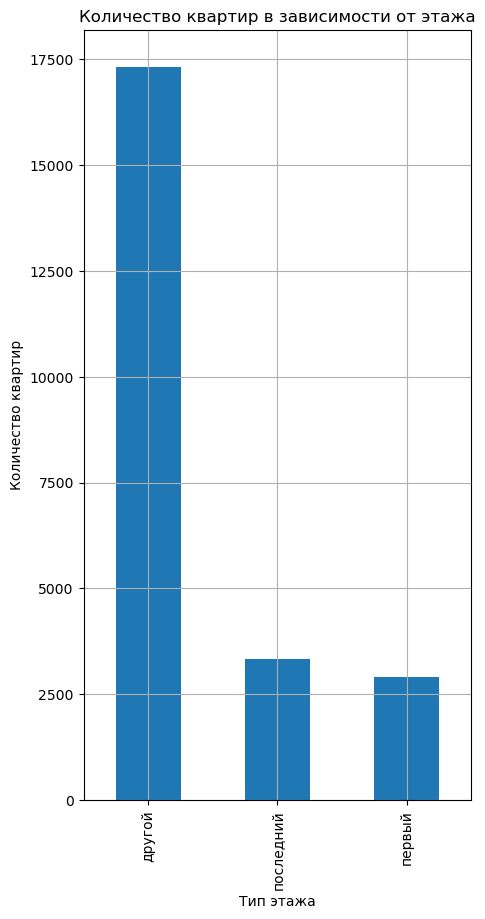

In [105]:
data['floor_type'].value_counts().plot(kind='bar', figsize=(5, 10), grid=True)
plt.title('Количество квартир в зависимости от этажа')
plt.xlabel('Тип этажа')
plt.ylabel('Количество квартир')
plt.show()

Видим, что большинство квартир находтся не на первом и не на последнем этаже.

#### Общее количество этажей в доме

In [106]:
data['floors_total'].describe()

count    23565.000000
mean        10.675875
std          6.594823
min          1.000000
25%          5.000000
50%          9.000000
75%         16.000000
max         60.000000
Name: floors_total, dtype: float64

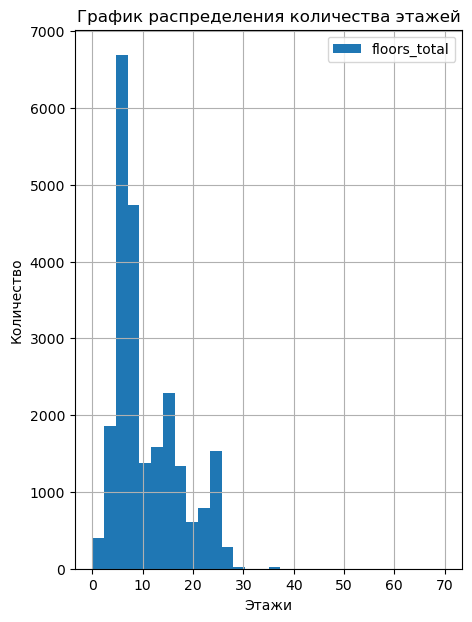

In [107]:
data.plot(y='floors_total', kind='hist', bins=30, range=(0, 70), grid=True, figsize=(5, 7))
plt.title('График распределения количества этажей')
plt.xlabel('Этажи')
plt.ylabel('Количество')
plt.show()

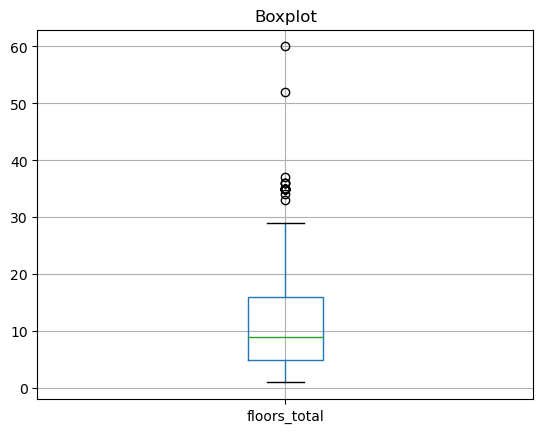

In [108]:
data.boxplot(column='floors_total')
plt.title('Boxplot')
plt.show()

Максимальное количество этажей составляет 60 (похоже на выброс), минимальное число этажей равно 1, в среднем приходится 10 этажей, медиана равна 9. Стандартное отклонение небольшое, выбросов не много. В основном значения расположились от 2 до 10. Из ящика с усами видим, что аномальные значения находятся выше 30, поэтому удалим их. 

In [109]:
data.query('floors_total <= 30')['floors_total'].describe()

count    23533.000000
mean        10.640930
std          6.527996
min          1.000000
25%          5.000000
50%          9.000000
75%         16.000000
max         29.000000
Name: floors_total, dtype: float64

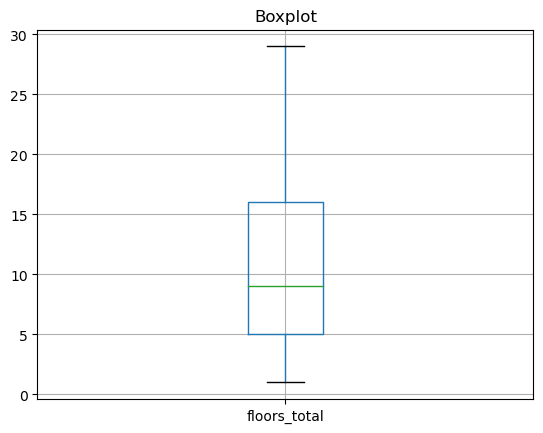

In [110]:
data.query('floors_total <= 30').boxplot('floors_total')
plt.title('Boxplot')
plt.show()

In [111]:
data.loc[data['floors_total'] <= 30, 'clear_floors_total'] = data['floors_total']

In [112]:
data['clear_floors_total'].describe()

count    23533.000000
mean        10.640930
std          6.527996
min          1.000000
25%          5.000000
50%          9.000000
75%         16.000000
max         29.000000
Name: clear_floors_total, dtype: float64

#### Расстояние до центра города в метрах

In [113]:
data['city_centers_nearest'].describe()

count    18064.000000
mean     14192.656056
std       8613.348153
min        181.000000
25%       9238.000000
50%      13096.500000
75%      16285.000000
max      65968.000000
Name: city_centers_nearest, dtype: float64

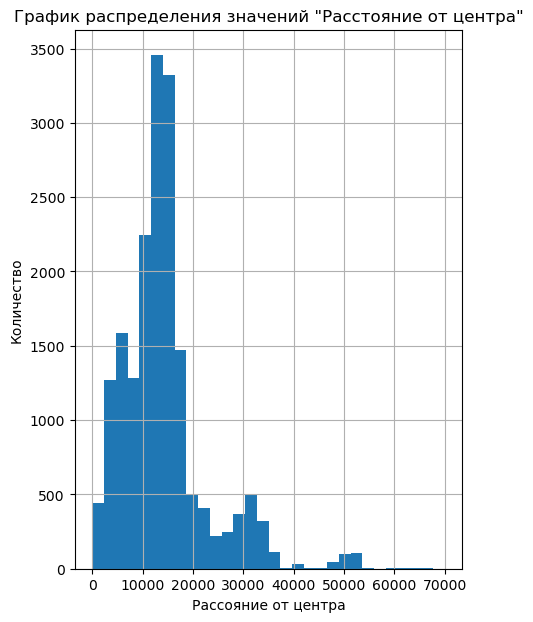

In [114]:
data['city_centers_nearest'].plot(y='city_centers_nearest', 
                                  kind='hist',
                                  bins=30,
                                  range=(0, 70000),
                                  figsize=(5, 7),
                                  grid=True)
plt.title('График распределения значений "Расстояние от центра"')
plt.xlabel('Рассояние от центра')
plt.ylabel('Количество')
plt.show()

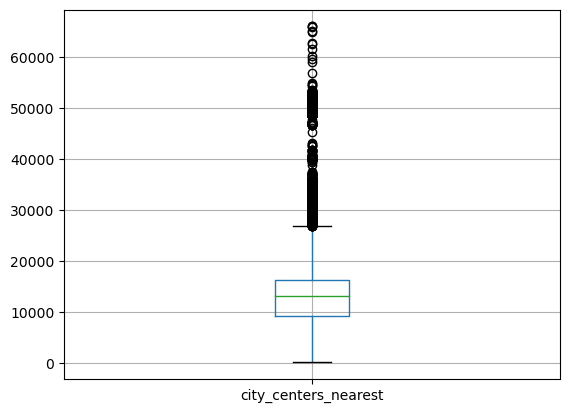

In [115]:
data.boxplot(column='city_centers_nearest')
plt.show()

Максимальное расстояние до центра равно 65968 м., минимальное 181 м. В среднем от квартиры до центра 14192 м., медиана равна 13098. Стандартное отклонение довольно высокое. В основном значения располагаются в диапазоне от 0 до 20000.

На ящике с усами видны выбросы, но так как расстояния собирались автоматически, не пользователем, обрабатывать их не буду.

#### Расстояние до ближайшего парка

In [116]:
data['parks_nearest'].describe()

count    8030.000000
mean      490.580448
std       341.572956
min         1.000000
25%       288.000000
50%       455.000000
75%       612.000000
max      3190.000000
Name: parks_nearest, dtype: float64

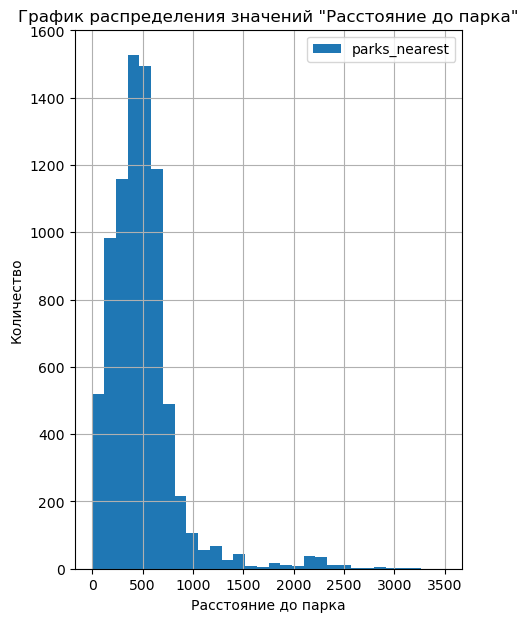

In [117]:
data.plot(y='parks_nearest', kind='hist', bins=30, range=(0, 3500), figsize=(5, 7), grid=True)
plt.title('График распределения значений "Расстояние до парка"')
plt.xlabel('Расстояние до парка')
plt.ylabel('Количество')
plt.show()

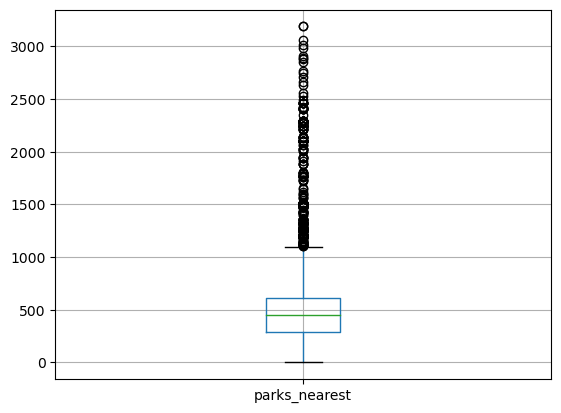

In [118]:
data.boxplot(column='parks_nearest')
plt.show()

Максимальное расстояние до парка равно 3190 м., а минимальное 1 м., в среднем от квартиры до парка 490 м., медиана равна 455 м. Стандартное отклонение высокое, значит присутствует большой разброс данных. В основном данные расположились от 0 до 750 м.

Ситуация с выбросами аналогична с расстоянием до центра.

In [119]:
filtered_data = data.copy()

In [120]:
filtered_data.reset_index(drop=True, inplace=True)

In [121]:
filter_shape = filtered_data.shape
filter_shape

(23565, 36)

In [122]:
percentage_info = filter_shape[0] / data_shape[0] * 100
display(f"Доля оставшихся данных: {percentage_info:.2f}%")

'Доля оставшихся данных: 99.43%'

Доля оставшихся данных составляет 0.99%, поэтому мы можем проводить анализ.

#### Cколько дней было размещено каждое объявление

Постройте гистограмму.
Посчитайте среднее и медиану.
В ячейке типа markdown опишите, сколько времени обычно занимает продажа. Какие продажи можно считать быстрыми, а какие — необычно долгими?

In [123]:
data['days_exposition'].describe()

count    20394.000000
mean       180.741395
std        219.732782
min          1.000000
25%         45.000000
50%         95.000000
75%        231.000000
max       1580.000000
Name: days_exposition, dtype: float64

In [124]:
days_mean = data['days_exposition'].mean()
days_median = data['days_exposition'].median()
display(f'Среднее для столбца days_exposition: {round(days_mean, 2)}')
display(f'Медиана для столбца days_exposition: {days_median}')

'Среднее для столбца days_exposition: 180.74'

'Медиана для столбца days_exposition: 95.0'

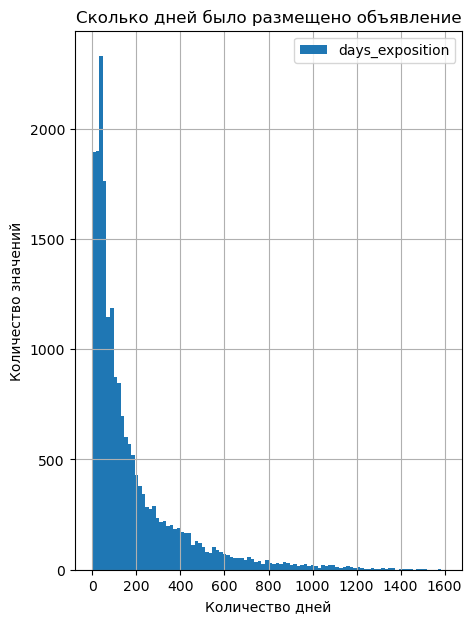

In [125]:
data.plot(y='days_exposition', 
          kind='hist',
          bins=100, 
          range=(0, 1600), 
          figsize=(5, 7), 
          grid=True)
plt.title('Сколько дней было размещено объявление')
plt.xlabel('Количество дней')
plt.ylabel('Количество значений')
plt.show()

В среднем объявление было размещено 180 дней, но медиана равна 95, она более точно описывает количество дней размещения объявления, так как независима от выбрасов. На гистограмме видим распределение Пуассона, в основном значения расположились от 0 до 200 дней, но самый пик приходится где-то на 45 дней.

Также на основе квартилей можно сделать вывод о том, что быстрыми продажами считаются те продажи, которые совершились за 45 дней, а необычно долгими те продажи, которые совершались за 232 и более дня.

#### Определение факторов, которые влияют на цену квартиры

Изучим, зависит ли цена от:

- общей площади;

- жилой площади;

- площади кухни;

- количества комнат;

- этажа, на котором расположена квартира (первый, последний, другой);

- даты размещения (день недели, месяц, год).

In [126]:
numeric_data = data.select_dtypes(include=[np.number])
correlation_matrix = numeric_data.corr()
correlation_matrix


,total_images,last_price,total_area,rooms,ceiling_height,floors_total,living_area,floor,kitchen_area,balcony,...,weekday,month,year,city_сenter_km,clear_total_area,clear_living_area,clear_kitchen_area,clear_rooms,filtered_ceiling_height,clear_floors_total
total_images,1.000000,0.105026,0.116969,0.099759,-0.001460,0.009822,0.105551,0.032781,0.106896,0.046879,...,-0.009325,0.004486,0.139238,-0.047562,0.127537,0.111621,0.106896,0.105026,0.024995,0.007568
last_price,0.105026,1.000000,0.653621,0.363191,0.062502,-0.006745,0.566380,0.026842,0.520362,0.008568,...,0.001357,0.002726,-0.042864,-0.206621,0.697984,0.558677,0.520362,0.356266,0.273563,-0.006785
total_area,0.116969,0.653621,1.000000,0.758735,0.077620,-0.075252,0.939771,-0.024368,0.609248,0.010243,...,-0.005680,0.004961,-0.079041,-0.231003,1.000000,0.921538,0.609248,0.751955,0.366318,-0.075924
rooms,0.099759,0.363191,0.758735,1.000000,0.043414,-0.227913,0.846117,-0.151341,0.270342,-0.015542,...,-0.005207,-0.003916,-0.054492,-0.183617,0.787990,0.870327,0.270342,1.000000,0.216238,-0.228853
ceiling_height,-0.001460,0.062502,0.077620,0.043414,1.000000,-0.021060,0.074642,-0.008667,0.071646,0.026016,...,-0.007132,-0.001148,-0.010284,-0.074512,0.060977,0.066775,0.071646,0.042625,1.000000,-0.025373
floors_total,0.009822,-0.006745,-0.075252,-0.227913,-0.021060,1.000000,-0.168940,0.678010,0.164803,0.173408,...,0.012542,0.016909,0.007883,0.018059,-0.041595,-0.173207,0.164803,-0.230827,-0.057872,1.000000
living_area,0.105551,0.566380,0.939771,0.846117,0.074642,-0.168940,1.000000,-0.096676,0.428909,-0.014786,...,-0.006312,-0.002440,-0.071434,-0.230293,0.915994,1.000000,0.428909,0.841318,0.351367,-0.169646
floor,0.032781,0.026842,-0.024368,-0.151341,-0.008667,0.678010,-0.096676,1.000000,0.136545,0.171507,...,0.011017,0.020736,0.005404,0.007859,-0.027665,-0.109008,0.136545,-0.154927,-0.028082,0.677622
kitchen_area,0.106896,0.520362,0.609248,0.270342,0.071646,0.164803,0.428909,0.136545,1.000000,0.046207,...,-0.008163,0.002476,-0.054781,-0.191648,0.535455,0.352270,1.000000,0.255137,0.326546,0.162809
balcony,0.046879,0.008568,0.010243,-0.015542,0.026016,0.173408,-0.014786,0.171507,0.046207,1.000000,...,-0.000728,0.009612,0.002874,0.065456,0.046421,-0.005619,0.046207,-0.013231,-0.071718,0.174124


##### Общая площадь и цена

In [127]:
data.columns

Index(['total_images', 'last_price', 'total_area', 'first_day_exposition',
       'rooms', 'ceiling_height', 'floors_total', 'living_area', 'floor',
       'is_apartment', 'studio', 'open_plan', 'kitchen_area', 'balcony',
       'locality_name', 'airports_nearest', 'city_centers_nearest',
       'parks_around3000', 'parks_nearest', 'ponds_around3000',
       'ponds_nearest', 'days_exposition', 'category_from_centers',
       'purified_locality_name', 'price_square_meter', 'weekday', 'month',
       'year', 'floor_type', 'city_сenter_km', 'clear_total_area',
       'clear_living_area', 'clear_kitchen_area', 'clear_rooms',
       'filtered_ceiling_height', 'clear_floors_total'],
      dtype='object')

In [128]:
price_total_area = data.pivot_table(index='clear_total_area', values='last_price', aggfunc='median')
price_total_area.reset_index(inplace=True)

In [129]:
price_total_area

,clear_total_area,last_price
0,12.0,2400000.0
1,13.0,1850000.0
2,13.2,1686000.0
3,14.0,1190000.0
4,15.0,1725000.0
...,...,...
1838,149.2,17000000.0
1839,149.3,25500000.0
1840,149.5,23411700.0
1841,149.6,22642800.0


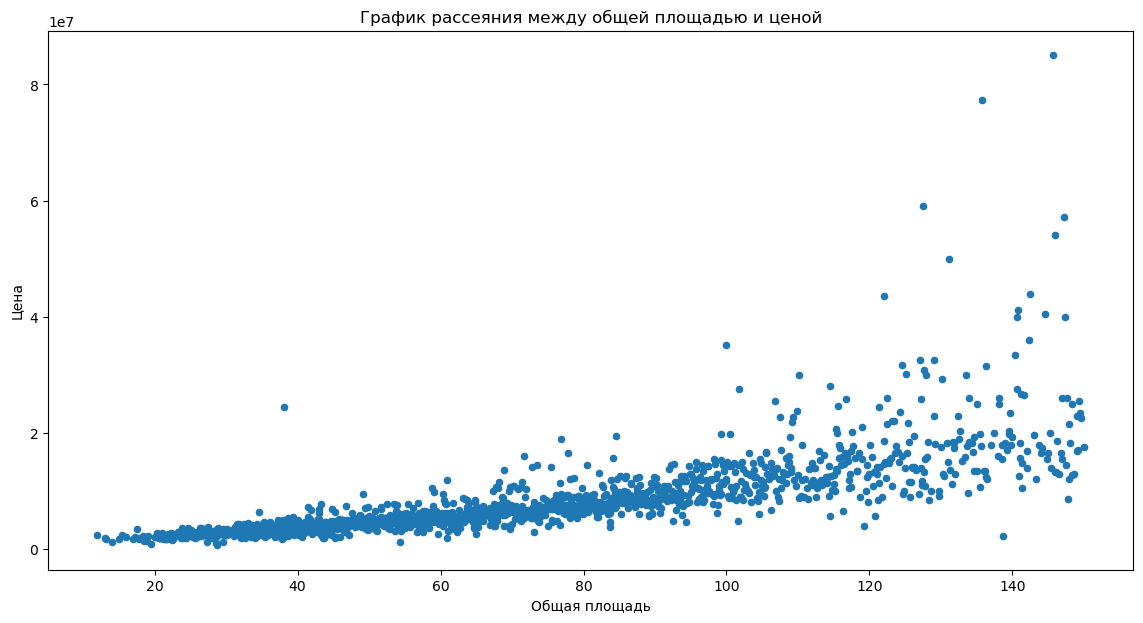

In [130]:
price_total_area.plot.scatter(x='clear_total_area', 
                              y='last_price', 
                              figsize=(14, 7))
plt.title('График рассеяния между общей площадью и ценой')
plt.xlabel('Общая площадь')
plt.ylabel('Цена')
plt.show()

In [131]:
data['clear_total_area'].corr(data['last_price'])

0.6979842247385835

На диаграмме рассеяния видим основную массу точек с наиболее частыми сочетаниями цены и общей площади квартиры. При этом с увеличением площади увеличивается и цена.
Коэффициент корреляции пирсона равен 0.698. В этом случае есть высокая положительная связь между ценой и общей площадью квартиры. 

##### Жилая площадь и цена

In [132]:
price_living_area = data.pivot_table(index='clear_living_area', values='last_price', aggfunc='median')
price_living_area.reset_index(inplace=True)

In [133]:
price_living_area

,clear_living_area,last_price
0,2.0,4340000.0
1,3.0,34715000.0
2,5.0,2680000.0
3,5.4,6100000.0
4,6.0,3799000.0
...,...,...
1673,147.2,51147600.0
1674,148.0,83950000.0
1675,148.6,14500000.0
1676,149.4,25000000.0


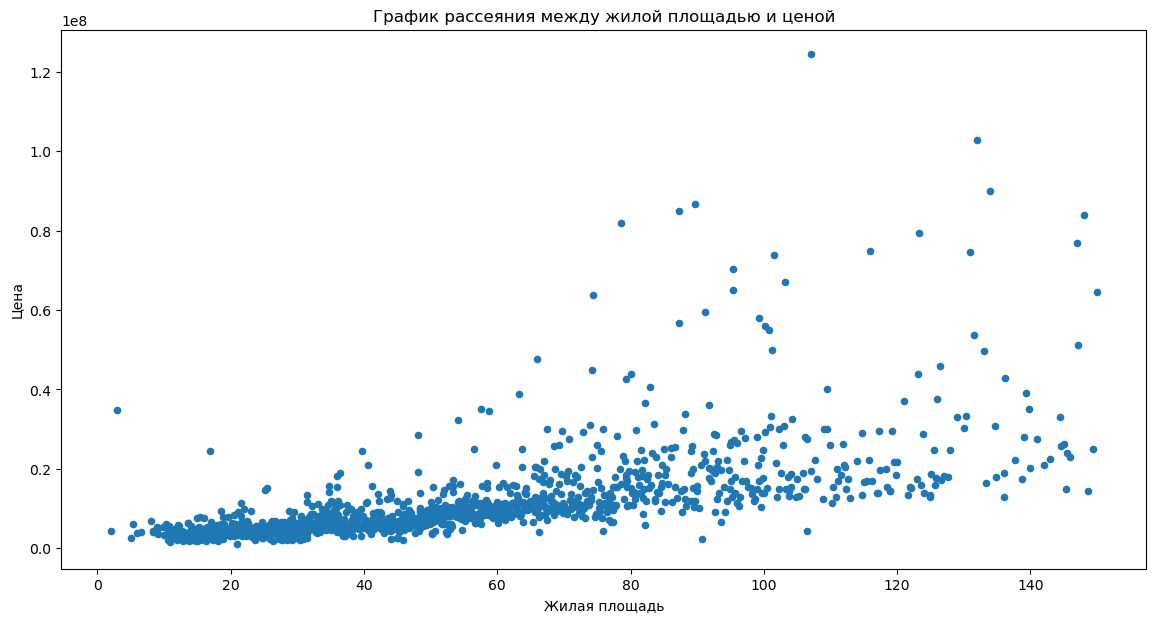

In [134]:
price_living_area.plot.scatter(x='clear_living_area', 
                               y='last_price', 
                               figsize=(14, 7))
plt.title('График рассеяния между жилой площадью и ценой')
plt.xlabel('Жилая площадь')
plt.ylabel('Цена')
plt.show()

In [135]:
data['clear_living_area'].corr(data['last_price'])

0.5586767268701358

По диаграмме рассеяния видим, что с увеличением жилой площади квартиры увеличивается и цена, однако, после 60 кв.м. наблюдается сильный разброс значений.
Коэффициент корреляции 0,56 между жилой площадью и ценой указывает на наличие средней положительной связи между жилой площадью и ценой квартиры. Это означает, что увеличение жилой площади обычно сопровождается увеличением цены квартиры, и наоборот, уменьшение жилой площади часто связано с уменьшением цены. 


##### Площади кухни и цена

In [136]:
price_kitchen_area = data.pivot_table(index='clear_kitchen_area', values='last_price', aggfunc='mean')
price_kitchen_area.reset_index(inplace=True)

In [137]:
price_kitchen_area

,clear_kitchen_area,last_price
0,1.30,4.250000e+06
1,2.00,2.821429e+06
2,2.30,2.940000e+06
3,2.40,2.200000e+06
4,2.89,5.967734e+06
...,...,...
958,93.20,8.240000e+07
959,100.00,6.500000e+07
960,100.70,1.250000e+07
961,107.00,8.500000e+07


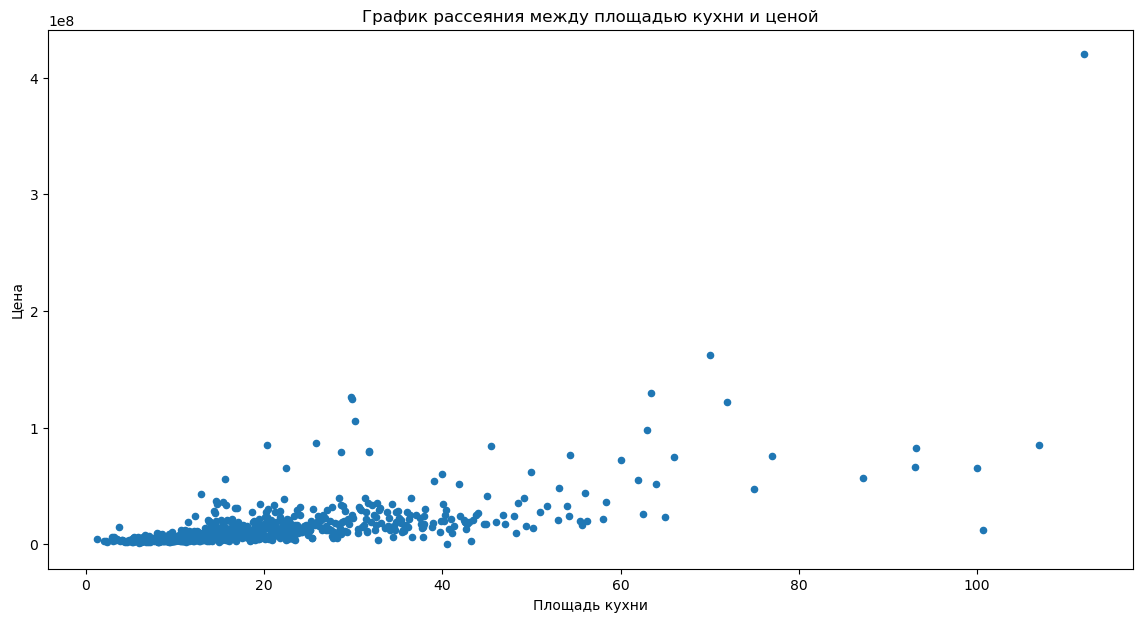

In [138]:
price_kitchen_area.plot.scatter(x='clear_kitchen_area', 
                                y='last_price',
                                figsize=(14, 7))
plt.title('График рассеяния между площадью кухни и ценой')
plt.xlabel('Площадь кухни')
plt.ylabel('Цена')
plt.show()

In [139]:
data['clear_kitchen_area'].corr(data['last_price'])

0.520361794965525

На диаграмме рассеяния видим, что при увеличении площади кухни, увеличивается и цена, основные значения представлены до 40 кв.м.
Коэффициент корреляции Пирсона равен 0.52, что говорит о средней положительной связи между площадью кухни и ценой квартиры. 

##### Количество комнат и цена

In [140]:
price_rooms = data.pivot_table(index='clear_rooms', values='last_price', aggfunc='mean')
price_rooms.reset_index(inplace=True)

In [141]:
price_rooms

,clear_rooms,last_price
0,0.0,3.344493e+06
1,1.0,3.833870e+06
2,2.0,5.587257e+06
3,3.0,8.174764e+06
4,4.0,1.341792e+07
5,5.0,2.379830e+07
6,6.0,3.188004e+07
7,7.0,5.147007e+07
8,8.0,5.022417e+07


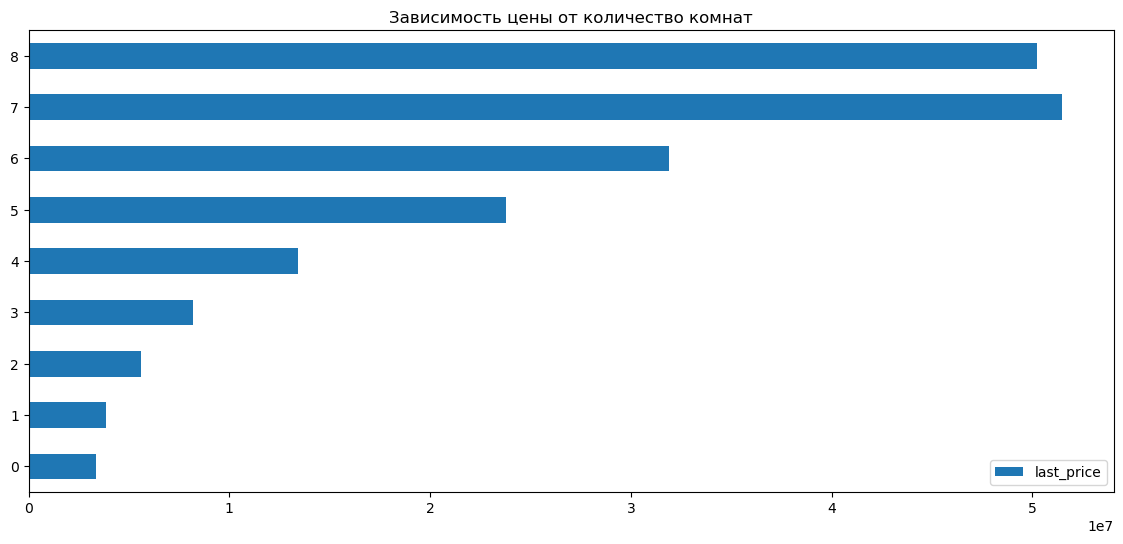

In [142]:
price_rooms.plot(y='last_price', kind='barh', figsize=(14, 6))
plt.title('Зависимость цены от количество комнат')
plt.show()

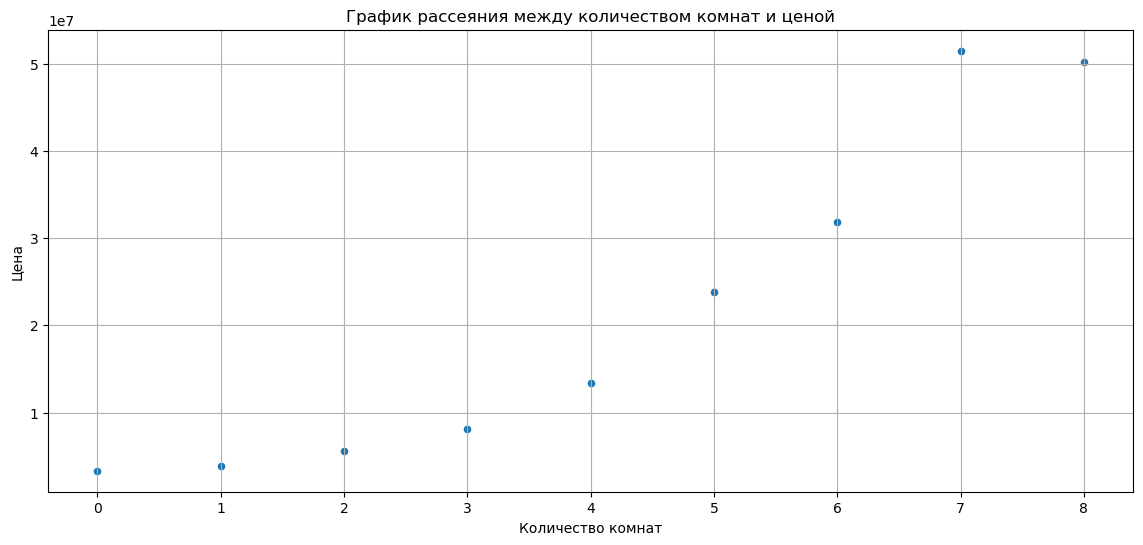

In [143]:
price_rooms.sort_values('clear_rooms').plot(x='clear_rooms', 
                                            y='last_price', 
                                            kind='scatter', 
                                            grid=True,
                                            figsize=(14, 6))
plt.title('График рассеяния между количеством комнат и ценой')
plt.xlabel('Количество комнат')
plt.ylabel('Цена')
plt.show()

In [144]:
data['clear_rooms'].corr(data['last_price'])

0.3562662618289736

На графике зависимости видим, что цена увеличивается в зависимости от количества комнат, но начиная с квартир, у которых 7 комнат, цена падает. Нужно смотреть на коэффициент корреляции.
Коэффициент корреляции 0.36 между количеством комнат и ценой квартиры указывает на наличие слабой положительной корреляции между этими двумя переменными. Это означает, что в общем случае увеличение количества комнат сопровождается некоторым увеличением цены квартиры, но связь не очень сильная. Из этого можно сделать вывод, что количество комнат имеет влияние на цену квартиры, но не является основным или доминирующим фактором, который определяет ее цену. 

##### Этаж, на котором расположена квартира, и цена

In [145]:
price_type_floor = data.pivot_table(index='floor_type', values='last_price', aggfunc='median')

In [146]:
price_type_floor

,last_price
floor_type,
другой,4848500.0
первый,3900000.0
последний,4300000.0


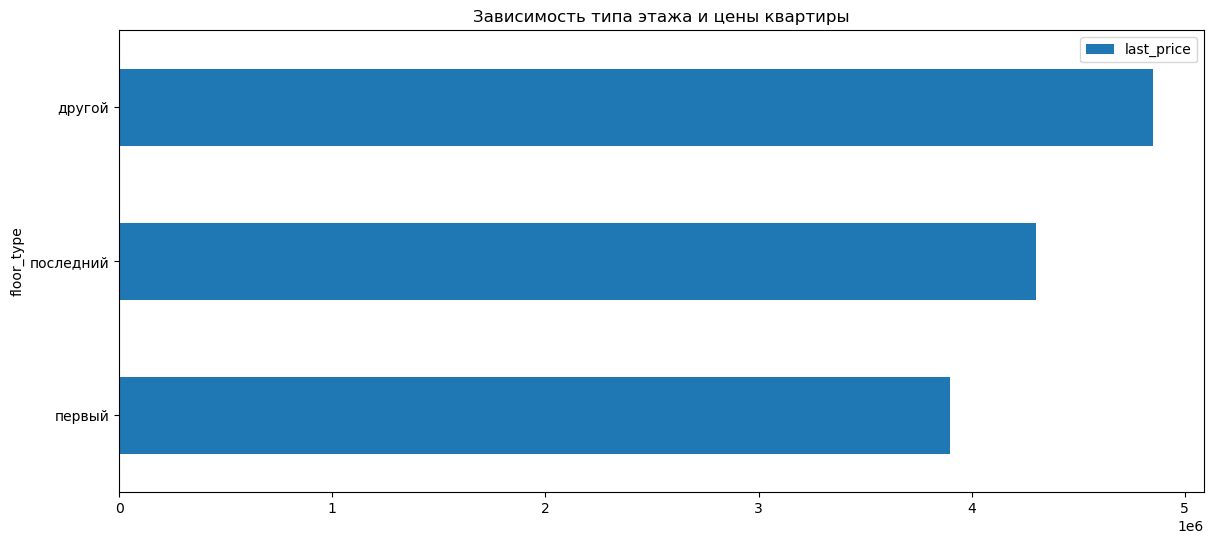

In [147]:
(price_type_floor
     .sort_values(by='last_price')
     .plot(y='last_price', kind='barh', title='Зависимость типа этажа и цены квартиры', figsize=(14, 6)))
plt.show()

На графике видим, что самые дорогие квартиры находятся не на первом и последнем этаже.

In [148]:
data_floor = data.copy()
def floor_to_value(fl): # функция нужна для того, чтобы посмотерть на коэффициент корреляции
    if fl == 'первый':
        return 1
    elif fl == 'последний':
        return 0
    else:
        return 2

data_floor['floor_type_int'] = data_floor['floor_type'].apply(floor_to_value)

In [149]:
data_floor['floor_type_int'].corr(data_floor['last_price'])

-0.002153979654488385

Коэффициент корреляции почти равен нулю, поэтому связи между ценой и типом этажа почти нет, нужно учитывать другие факторы.

##### Дата размещения и цена

In [150]:
price_day = data.pivot_table(index='weekday', values='last_price', aggfunc='median')
price_day

,last_price
weekday,
0,4650000.0
1,4720000.0
2,4700000.0
3,4650000.0
4,4550000.0
5,4550000.0
6,4530000.0


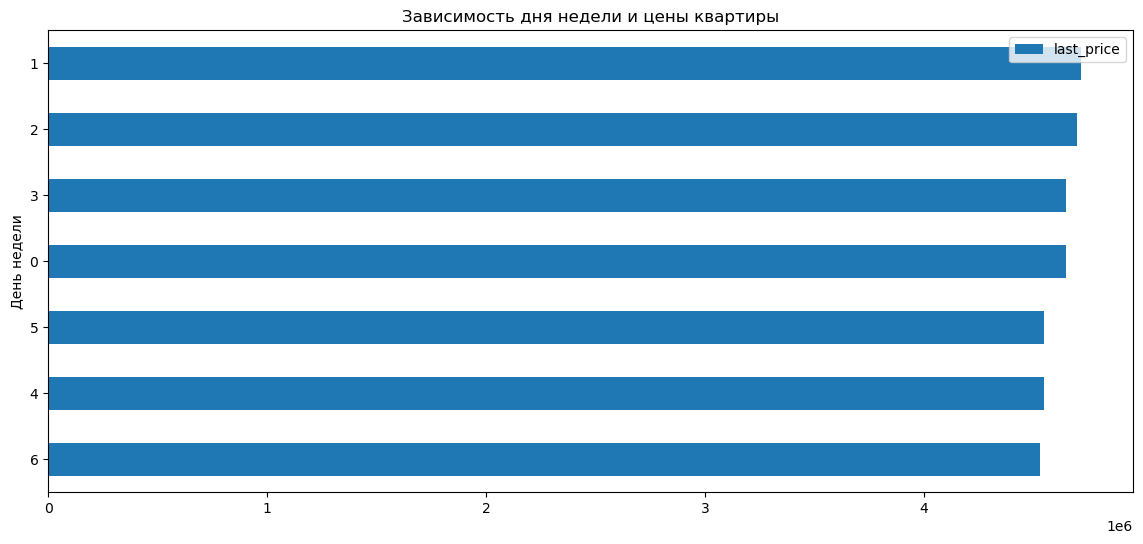

In [151]:
(price_day
     .sort_values(by='last_price')
     .plot(y='last_price', kind='barh', title='Зависимость дня недели и цены квартиры', figsize=(14, 6)))
plt.ylabel('День недели')
plt.show()

In [152]:
data['weekday'].corr(data['last_price'])

0.0013569211122710762

На графике видим, что самые дорогие квартиры размещаются во вторник, а самые дешевые в воскресенье. Но если говорить о зависимости, то коэффициент корреляции почти равен нулю, поэтому связи между ними почти нет.

In [153]:
price_month = data.pivot_table(index='month', values='last_price', aggfunc='median')
price_month

,last_price
month,
1,4600000.0
2,4650000.0
3,4650000.0
4,4800000.0
5,4500000.0
6,4400000.0
7,4650000.0
8,4570000.0
9,4700000.0


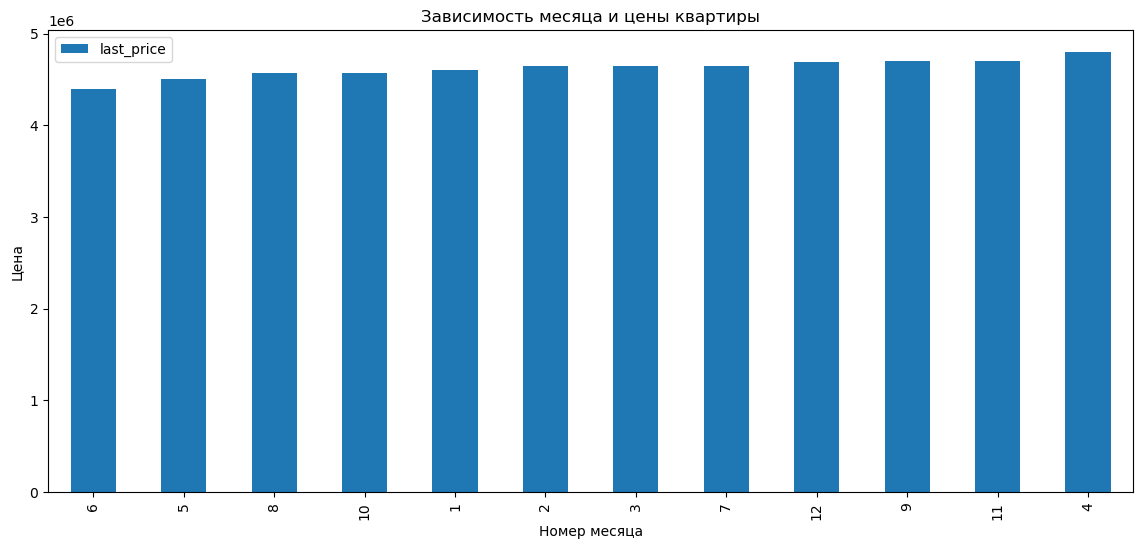

In [154]:
(price_month
     .sort_values(by='last_price')
     .plot(y='last_price', kind='bar', title='Зависимость месяца и цены квартиры', figsize=(14, 6)))
plt.xlabel('Номер месяца')
plt.ylabel('Цена')
plt.show()

In [155]:
data['month'].corr(data['last_price'])

0.0027259571647347608

На графики видим, что самые дорогие квартиры размещались в апреле, а самые дешевые в июне. Коэффициент Пирсона почти равен нулю, поэтому связь между этими двумя переменными очень слабая.

In [156]:
price_year = data.pivot_table(index='year', values='last_price', aggfunc='median')
price_year

,last_price
year,
2014,7640000.0
2015,5300500.0
2016,4530000.0
2017,4500000.0
2018,4550000.0
2019,5050000.0


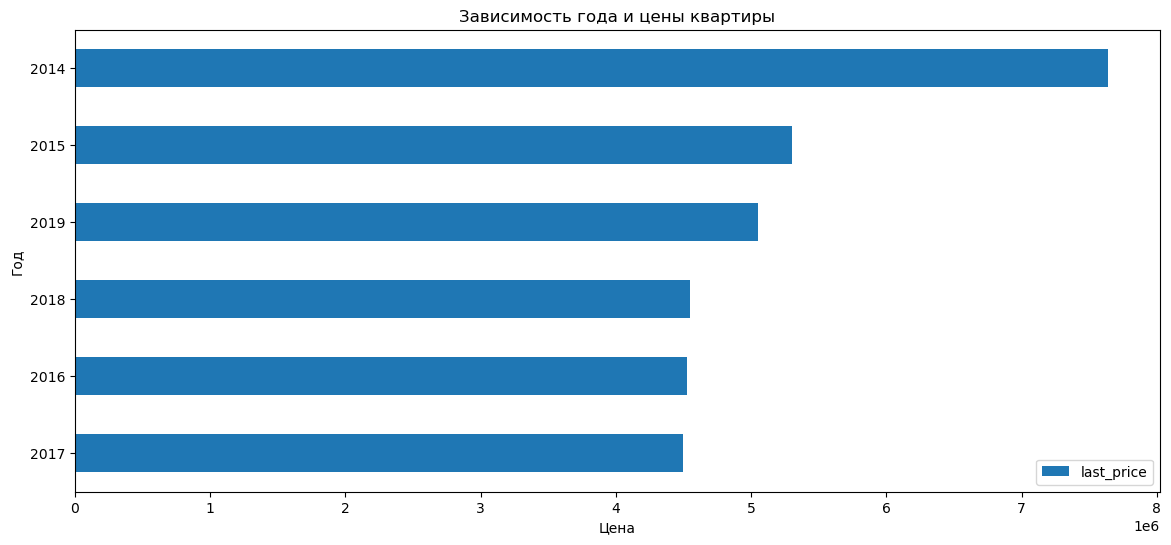

In [157]:
(price_year
     .sort_values(by='last_price')
     .plot(y='last_price', kind='barh', title='Зависимость года и цены квартиры', figsize=(14, 6)))
plt.ylabel('Год')
plt.xlabel('Цена')
plt.show()

In [158]:
data['year'].corr(data['last_price'])

-0.04286415271361104

На графике видим, что самая высокая цена на квартиры была в 2014 году, а самая низкая в 2017 году. Коэффициент корреляции равен -0.043, что говорит о слабой отрицательной связи между годом и ценой квартир. 

In [159]:
total_area_year = data.pivot_table(index='year', values='total_area', aggfunc='median')

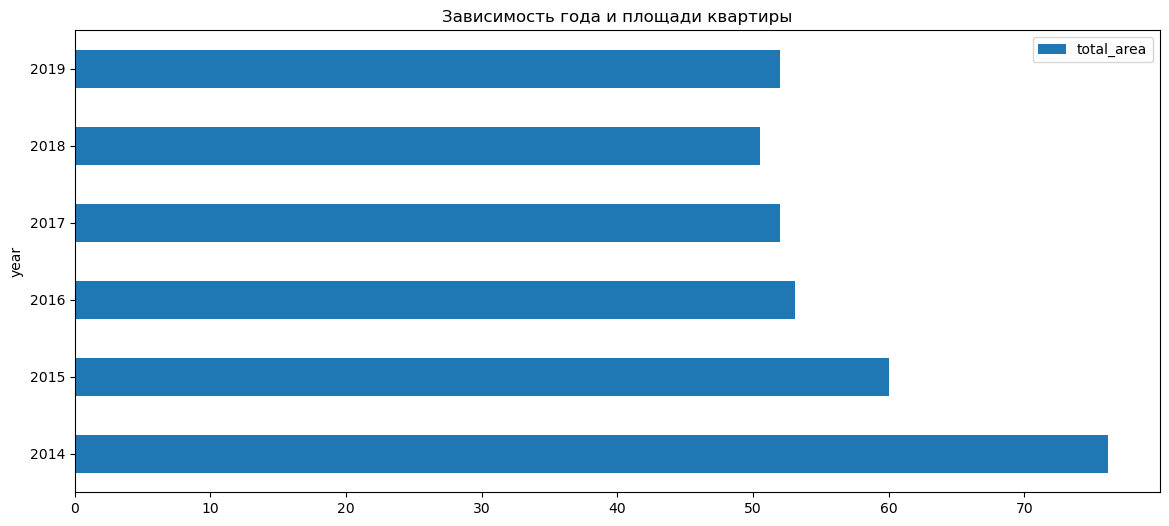

In [160]:
(total_area_year
     .sort_values(by='year')
     .plot(y='total_area', kind='barh', title='Зависимость года и площади квартиры', figsize=(14, 6)))
plt.show()

Видим, что самая большая площадь квартир была в 2014 года, затем она убывает. Такой же характер имеет и зависимость между годом и ценой.

#### Средняя цена одного квадратного метра в 10 населённых пунктах с наибольшим числом объявлений

In [161]:
data_locality_meter = data.pivot_table(index='purified_locality_name', values='price_square_meter', aggfunc=['count', 'mean'])

In [162]:
data_locality_meter.columns = ['count', 'mean_price_square_meter']

In [163]:
top_10_square_metre = data_locality_meter.sort_values('count', ascending=False).head(10)

In [164]:
top_10_square_metre

,count,mean_price_square_meter
purified_locality_name,,
Санкт-Петербург,15651,114868.877339
Мурино,586,86041.116024
Кудрово,470,95260.846128
Шушары,439,78551.344647
Всеволожск,398,68654.473970
Пушкин,369,103125.819377
Колпино,338,75424.579112
Парголово,327,90175.913089
Гатчина,307,68746.146515


Представленная таблица содержит информацию о средней стоимости квадратного метра в 10 населенных пунктах, отобранных по наибольшему количеству объявлений.

Наибольшее количество объявлений находится в Санкт-Петербурге (15 721), в этом населенном пункте самая высокая средняя стоимость одного квадртаного метра, которая равна 114 849.01.

Топ 10 замыкает Выборг, в котором 237 объявлений, средняя цена одного квадратного метра равняется 58 141.91.

#### Средняя цена квартиры в зависимости от удаления от центра.

In [165]:
data.columns

Index(['total_images', 'last_price', 'total_area', 'first_day_exposition',
       'rooms', 'ceiling_height', 'floors_total', 'living_area', 'floor',
       'is_apartment', 'studio', 'open_plan', 'kitchen_area', 'balcony',
       'locality_name', 'airports_nearest', 'city_centers_nearest',
       'parks_around3000', 'parks_nearest', 'ponds_around3000',
       'ponds_nearest', 'days_exposition', 'category_from_centers',
       'purified_locality_name', 'price_square_meter', 'weekday', 'month',
       'year', 'floor_type', 'city_сenter_km', 'clear_total_area',
       'clear_living_area', 'clear_kitchen_area', 'clear_rooms',
       'filtered_ceiling_height', 'clear_floors_total'],
      dtype='object')

In [166]:
data_saint_centre_price = (data.
                           query('purified_locality_name == "Санкт-Петербург" and city_сenter_km != 0').
                           pivot_table(index='city_сenter_km', values='last_price', aggfunc='mean'))

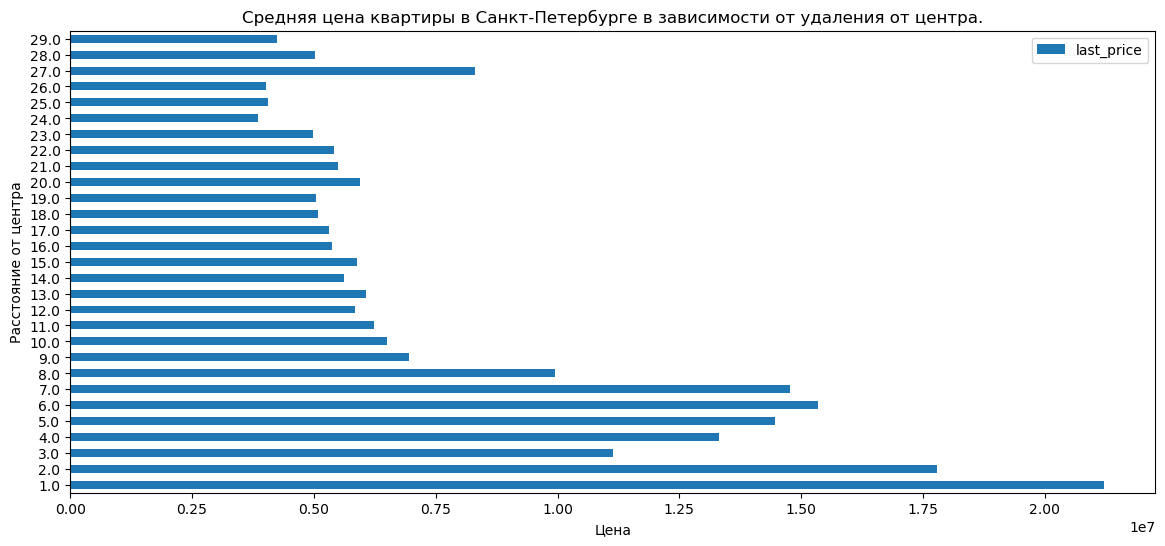

In [167]:
data_saint_centre_price.plot(y='last_price', 
                             kind='barh',
                             figsize=(14, 6),
                             title='Средняя цена квартиры в Санкт-Петербурге в зависимости от удаления от центра.')
plt.ylabel('Расстояние от центра')
plt.xlabel('Цена')
plt.show()

In [168]:
data_saint_centre_price

,last_price
city_сenter_km,
1.0,2.120672e+07
2.0,1.778832e+07
3.0,1.113739e+07
4.0,1.330428e+07
5.0,1.445600e+07
6.0,1.533842e+07
7.0,1.477515e+07
8.0,9.949111e+06
9.0,6.956583e+06


Самые дорогие квартиры находятся в пределах 7 км. затем стоимость начинает снижаться.

**Вывод по исследовательскому анализу:**

1.1 В ходе исследовательского анлиза были изучены следующие параметры  и постройны отдельные гистограммы для каждого из этих параметров:


- общая площадь - этот параметр имеет аномалии, которые были обработаны путём удаления из выборки аномальных значений, то есть оставили только общую площадь менее 200 кв.м., такие выбросы могли возникнуть из-за ошибки пользователя (указал не верную разрядность). Максимальное значение после обработки аномалий площади составляет 200 кв.м. (было 900 кв.м.), минимальное 12 кв.м., среднее значение похоже на реальное и составляет 58 кв.м., медиана равняется 51.9 кв.м.. Величины в выборке находятся в пределах примерно плюс-минус 35.65 единиц от среднего значения.


- жилая площадь также имеет аномалии, однако существуют квартиры с жилой площадью более 80 кв.м. Как и в случае с общей площадью аккуратно их обработаем,10.4 путём ограничения максимальной жилой площади до 150 кв.м., минимальное значение жилой площади составляет 2 кв.м., максимальное значение 150 кв.м. (409 кв.м. до обработки), среднее значение равняется 33.57 кв.м, удалим значения, которые превышают 45 кв.м., основываясь на гистограмме, так как на рынке действительно могут встречаться квартиры с кухней более 45 кв.м., но их очень мало. (до обработки 34.45), что отражает реальную картину, так как . человека приходится 33 кв.м. жилой площади, медиана равна 30 кв.м. 


- площадь кухни - максимальное значение площади кухни равняется 45 кв.м. (до обработки 112 кв.м.), мнимальное значение 1,3 кв.м., среднее значение равняется  10.4 (10,5 кв.м.), а медиана 9,1 кв.м. Стандартное отклонение небольшое, поэтому выбросов не так много, удалим значения, которые превышают 45 кв.м., основываясь на гистограмме, так как на рынке действительно могут встречаться квартиры с кухней более 45 кв.м., но их очень мало. Основные значения расположились от 0 до 20 кв.м., затем видно снижение.


- цена объекта - максимальное значение цены составляет 763 000 000, минимальное 12190 (что похоже на аномалию), среднее составляет 6 541 549, медиана равняется 4 650 000. Стандартное отклонение для столбца last_price составляет примерно 10 887 010. Это довольно большое значение, что может указывать на значительный разброс цен между отдельными квартирами. Величины в выборке находятся в пределах 2-х и 7-ми миллионов. На ящике с усами видно большоее количество выбросов, но цену выставляют пользователи, и зачастаую цена завышена, поэтому обрабатывать такие аномалии не станем.


- количество комнат - максимальное значение комнат 8 (19 до обработки аномалий), минимальное равно 0 (возможно такой параметр характерен для квартир-студий. В среднем в квартирах 2 комнаты, мидиана равняется 2.77. Большинство значений расположились от 1 до 3 комнат. Считаю, что наиболее безопасным решением будет ограничить количество комнат от 0 до 8, так как это значения, которые имеют место быть на рынке недвижимости, особенно в больших городах.


- высота потолков - максимальная высота потолков 8.3 м. (100 было до обработки аномалий), минимальная высота 2.4 (0 было до обработки аномалий), среднее похоже на правду, так как оно равняет 2,7. В основном значения расположились от 2,5 до 2,8. Если всё же принять за реальную высоту потолков категорию "от 2.4 до 10", то избавимся от выбросов путём поделить все значения, которые больше 10 на 10, а затем удалим выбросы.. Аномальные значения могли получится из-за ошибок ввода данных пользователем, к примеру могла быть не верно указана разрядность (26 вместо 2.6).


- тип этажа квартиры («первый», «последний», «другой») - с помощью гистограммы было выявлено, что большинство кваритир находятся не на первом и не на последнем этаже, меньше всего квартир располагается на первом.


- общее количество этажей в доме -  максимальное количество этажей составляет 29 (60 до обработки аномалий), минимальное число этажей равно 1, в среднем приходится 10 этажей, медиана равна 9. В основном значения расположились от 2 до 10. Из ящика с усами мы увидили, что аномальные значения находятся выше 30, поэтому удалим их.


- расстояние до центра города в метрах - максимальное расстояние до центра равно 65968 м., минимальное 181 м. В среднем от квартиры до центра 14191 м., медиана равна 13098. Стандартное отклонение довольно высокое. В основном значения располагаются в диапазоне от 0 до 20000. На ящике с усами видны выбросы, но так как расстояния собирались автоматически, не пользователем, обрабатывать их не буду.


- расстояние до ближайшего парка максимальное расстояние до парка равно 3190 м., а минимальное 1 м., в среднем от квартиры до парка 490 м., медиана равна 455 м. Стандартное отклонение высокое, значит присутствует большой разброс данных. В основном данные расположились от 0 до 750 м. Ситуация с выбросами аналогична с расстоянием до центра.


1.2 Было проанализировано сколько дней было размещено каждое объявление.


- В среднем объявление было размещено 180 дней, но медиана равна 95, она более точно описывает количество дней размещения объявления, так как независима от выбрасов. На гистограмме видим распределение Пуассона, в основном значения расположились от 0 до 200 дней, но самый пик приходится где-то на 45 дней. Также на основе квартилей можно сделать вывод о том, что быстрыми продажами считаются те продажи, которые совершились за 45 дней, а необычно долгими те продажи, которые совершались за 232 и более дня.

1.3 Определение факторов, которые влияют на цену квартиры


- Общая площадь сильно влияет на цену квартиры. На диаграмме рассеяния можно было увидеть основную массу точек с наиболее частыми сочетаниями цены и общей площади квартиры. Коэффициент корреляции пирсона равен 0.698. В этом случае есть высокая положительная связь между ценой и общей площадью квартиры.


- Жилая площадь влияет на цену квартиры. По диаграмме рассеяния видим, что с увеличением жилой площади квартиры увеличивается и цена, однако, после 60 кв.м. наблюдается сильный разброс значений. Коэффициент корреляции 0,56 между жилой площадью и ценой указывает на наличие средней положительной связи между жилой площадью и ценой квартиры. 


- Площадь кухни влияет на цену квартиры. На диаграмме рассеяния мы увидели, что при увеличении площади кухни, увеличивается и цена, основные значения представлены до 40 кв.м. Коэффициент корреляции Пирсона равен 0.52, что говорит о средней положительной связи между площадью кухни и ценой квартиры.


- Количество комнат влияет на цену квартиры, но не является определяющим фактором. На графике зависимости цена увеличивается в зависимости от количества комнат, но начиная с квартир, у которых 7 комнат, цена падает. Коэффициент корреляции 0.36 между количеством комнат и ценой квартиры указывает на наличие слабой положительной связи между этими двумя переменными. 


- Этаж, на котором расположена квартира не влияет на стоимость квартиры. Изучая график, мы увидели, что самые дорогие квартиры находятся не на первом и последнем этаже, однако, коэффициент корреляции почти равен нулю, поэтому нужно рассмотривать другие факторы. 


- Даты размещения (день недели, месяц, год) не влияют на цену квартиры. Если говорить о дне недели, то на графике самые дорогие квартиры размещаются во вторник, а самые дешевые в воскресенье. Но если говорить о зависимости, то коэффициент корреляции почти равен нулю, поэтому связи между ними почти нет. Изучая как влияет месяц публикации на цену квартиры, был построен график, на котором самые дорогие квартиры размещались в апреле, а самые дешевые в июне. Коэффициент Пирсона почти равен нулю, поэтому связь между этими двумя переменными очень слабая. Касаемо года, На графике видим, что самая высокая цена на квартиры была в 2014 году, а самая низкая в 2017 году. Коэффициент корреляции равен -0.043, что говорит о слабой отрицательной связи между годом и ценой квартир.

1.4 Населённые пункты с самой высокой и низкой средней стоимостью квадратного метра.

- Наибольшее количество объявлений находится в Санкт-Петербурге (15 721), в этом населенном пункте самая высокая средняя стоимость одного квадртаного метра, которая равна 114 849.01. Топ 10 замыкает Выборг, в котором 237 объявлений, средняя цена одного квадратного метра равняется 58 141.91.

1.5 Стоимость квартир в Санкт-Петербурге в зависимости от расстояния до центра города.

- Самые дорогие квартиры находятся в пределах 7 км. от центра.  


### Напишите общий вывод

Мною был проанализирован архив объявлений о продаже квартир в Санкт-Петербурге и соседних населённых пунктах за несколько лет, а также были выявлены факторы, которые влияют на цену квартиры. Перед тем как перейти к основной части выводов поговорим о качестве данных. В датафрейме присутствует большое количество пропусков и аномальных значений, которые были обработаны самостоятельно там, где это возможно, также многие столбцы имели неверный тип данных.

В ходе исследования были проанализированы факторы, которые могут влият на стоимость квартиры. Рассмотрим их подробнее.

1) Общая площадь сильно влияет на цену квартиры. 
- На диаграмме рассеяния можно было увидеть основную массу точек с наиболее частыми сочетаниями цены и общей площади квартиры. Коэффициент корреляции пирсона равен 0.698. В этом случае есть высокая положительная связь между ценой и общей площадью квартиры.

2) Жилая площадь влияет на цену квартиры. 
- По диаграмме рассеяния видим, что с увеличением жилой площади квартиры увеличивается и цена, однако, после 60 кв.м. наблюдается сильный разброс значений. Коэффициент корреляции 0,56 между жилой площадью и ценой указывает на наличие средней положительной связи между жилой площадью и ценой квартиры.

3) Площадь кухни влияет на цену квартиры. 
- На диаграмме рассеяния мы увидели, что при увеличении площади кухни, увеличивается и цена, основные значения представлены до 40 кв.м. Коэффициент корреляции Пирсона равен 0.52, что говорит о средней положительной связи между площадью кухни и ценой квартиры.

4) Количество комнат влияет на цену квартиры, но не является определяющим фактором. 
- На графике зависимости цена увеличивается в зависимости от количества комнат, но начиная с квартир, у которых 7 комнат, цена падает. Коэффициент корреляции 0.36 между количеством комнат и ценой квартиры указывает на наличие слабой положительной связи между этими двумя переменными.

5) Этаж, на котором расположена квартира не влияет на стоимость квартиры. 
- Изучая график, мы увидели, что самые дорогие квартиры находятся не на первом и последнем этаже, однако, коэффициент корреляции почти равен нулю, поэтому нужно рассмотривать другие факторы.

6) Даты размещения (день недели, месяц, год) не влияют на цену квартиры. 
- Если говорить о дне недели, то на графике самые дорогие квартиры размещаются во вторник, а самые дешевые в воскресенье. Но если говорить о зависимости, то коэффициент корреляции почти равен нулю, поэтому связи между ними почти нет. 
- Изучая как влияет месяц публикации на цену квартиры, был построен график, на котором самые дорогие квартиры размещались в апреле, а самые дешевые в июне. Коэффициент Пирсона почти равен нулю, поэтому связь между этими двумя переменными очень слабая. 
- Касаемо года, На графике видим, что самая высокая цена на квартиры была в 2014 году, а самая низкая в 2017 году. Коэффициент корреляции равен -0.043, что говорит о слабой отрицательной связи между годом и ценой квартир.

Также были найдены 10 населённых пунктов, отобранных по количеству объявлений, с самой высокой и низкой средней стоимостью квадратного метра.

- Наибольшее количество объявлений находится в Санкт-Петербурге (15 721 объявление), в этом населенном пункте самая высокая средняя стоимость одного квадртаного метра, которая равна 114 849,01. Топ 10 замыкает Выборг, в котором 237 объявлений, средняя цена одного квадратного метра равняется 58 141,91.

В конце анализа рассмотрена динамика изменения цены квартиры в Санкт-Петербурге в зависимости от удаления от центра.

- Самые дорогие квартиры находятся в пределах 7 км. от центра. Затем цена начинает снижаться.

В заключении отражены рекомендации по сбору данных. Так как в данных присутствует большое количество пропусков и аномалий, стоит обратить внимание на следующие параметры:

-  Дата публикации (first_day_exposition) - пропусков нет, однако тип данных должен быть datetime, также указывается время, которое везде представлено как "00:00:  
- Высота потолков (ceiling_height) - присутствуют пропуски и аномальные значения, в этом случае возможны ошибки пользователей в заполнении данных, например указывают неверную разрядность.
- Всего этажей в доме (floors_total) - присутствуют пропуски и тип данных должен быть целочисленным.
- Жилая площадь (living_area) - присутствуют пропуски 
- Апартаменты или нет (is_apartment) - присутствуют пропуски, возможно пользователи не знают что такое апартаменты, также пользователи могут пропускать данный пункт так как уверенны, что это не апартаменты.       
- Площадь кухни (kitchen_area) - присутствуют пропуски  
- Число балконов (balcony) - присутствуют пропуски
- Название населенного пункта (locality_name) - присутствуют пропуски
- Сколько дней было размещено объявлений (days_exposition) - присутствуют пропуски, также данный столбце должен соответствовать тпу данных int, так как это количество дней
- Данные, которые собираются автоматически имеют пропуски: расстояние до ближайшего аэропорта в метрах (airports_nearest), расстояние до центра города (cityCenters_nearest), число парков в радиусе 3 км (parks_around3000), Расстояние до ближайшего парка (parks_nearest), число водоёмов в радиусе 3 км (ponds_around3000), расстояние до ближайшего водоёма (ponds_nearest), расстояние до центра города (cityCenters_nearest), также стоит изменить название столбца cityCenters_nearest, так как оно некорректно. 

**Чек-лист готовности проекта**

Поставьте 'x' в выполненных пунктах. Далее нажмите Shift+Enter.

- [x]  Файл с данными открыт.
- [x]  Файл с данными изучен: выведены первые строки, использован метод `info()`, построены гистограммы.
- [x]  Найдены пропущенные значения.
- [x]  Пропущенные значения заполнены там, где это возможно.
- [x]  Объяснено, какие пропущенные значения обнаружены.
- [x]  В каждом столбце установлен корректный тип данных.
- [x]  Объяснено, в каких столбцах изменён тип данных и почему.
- [x]  Устранены неявные дубликаты в названиях населённых пунктов.
- [x]  Обработаны редкие и выбивающиеся значения (аномалии).
- [x]  В таблицу добавлены новые параметры:
       – цена одного квадратного метра;
       – день публикации объявления (0 - понедельник, 1 - вторник и т. д.);
       – месяц публикации объявления;
       – год публикации объявления;
       – тип этажа квартиры (значения — «первый», «последний», «другой»);
       – расстояние до центра города в километрах.
- [x]  Изучены и описаны параметры:
        - общая площадь;
        - жилая площадь;
        - площадь кухни;
        - цена объекта;
        - количество комнат;
        - высота потолков;
        - тип этажа квартиры («первый», «последний», «другой»);
        - общее количество этажей в доме;
        - расстояние до центра города в метрах;
        - расстояние до ближайшего парка.
- [x]  Выполнено задание «Изучите, как быстро продавались квартиры (столбец `days_exposition`)»:
    - построена гистограмма;
    - рассчитаны среднее и медиана;
    - описано, сколько обычно занимает продажа и указано, какие продажи можно считать быстрыми, а какие — необычно долгими.
- [x]  Выполнено задание «Определите факторы, которые больше всего влияют на общую (полную) стоимость объекта». Построены графики, которые показывают зависимость цены от параметров:
        - общая площадь;
        - жилая площадь;
        - площадь кухни;
        - количество комнат;
        - тип этажа, на котором расположена квартира (первый, последний, другой);
        - дата размещения (день недели, месяц, год).
- [x]  Выполнено задание «Посчитайте среднюю цену одного квадратного метра в 10 населённых пунктах с наибольшим числом объявлений»:
    - выделены населённые пункты с самой высокой и низкой стоимостью квадратного метра.
- [x]  Выполнено задание «Выделите квартиры в Санкт-Петербурге с помощью столбца `locality_name` и вычислите их среднюю стоимость на разном удалении от центра»:
    -  учтён каждый километр расстояния, известны средние цены квартир в одном километре от центра, в двух и так далее;
    -  описано, как стоимость объекта зависит от расстояния до центра города;
    -  построен график изменения средней цены для каждого километра от центра Петербурга.
- [x]  На каждом этапе сделаны промежуточные выводы.
- [x]  В конце проекта сделан общий вывод.